In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf1=pd.read_csv('1.csv')
traindf2=pd.read_csv('2.csv')
traindf3=pd.read_csv('3.csv')
traindf4=pd.read_csv('4.csv')
traindf5=pd.read_csv('5.csv')
testdf=pd.read_csv('test.csv')

In [3]:
df=[traindf1,traindf2,traindf3,traindf4,traindf5]
for i in df:
    print(i.shape)

(12212, 8)
(12212, 8)
(12212, 8)
(12212, 8)
(12212, 9)


In [4]:
testdf.columns

Index(['climbRate', 'Sgz', ''p'', ''q'', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se'],
      dtype='object')

In [5]:
traindf=pd.concat(df,axis=1)
traindf.shape

(12212, 41)

In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12212 non-null  int64  
 1   Sgz           12210 non-null  float64
 2   'p'           12211 non-null  float64
 3   'q'           12210 non-null  float64
 4   curPitch      12210 non-null  float64
 5   curRoll       12212 non-null  float64
 6   absRoll       12212 non-null  int64  
 7   diffClb       12204 non-null  float64
 8   diffRollRate  12209 non-null  float64
 9   diffDiffClb   12211 non-null  float64
 10  SeTime1       12210 non-null  float64
 11  SeTime2       12212 non-null  float64
 12  SeTime3       12210 non-null  float64
 13  SeTime4       12208 non-null  float64
 14  SeTime5       12210 non-null  float64
 15  SeTime6       12209 non-null  float64
 16  SeTime7       12212 non-null  float64
 17  SeTime8       12212 non-null  float64
 18  SeTime9       12212 non-nu

In [7]:
corr=traindf.corr()
corr

,climbRate,Sgz,'p','q',curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
climbRate,1.000000,-0.005850,0.162183,0.093543,-0.790106,-0.122293,-3.772204e-02,0.075142,0.159333,-0.331158,...,6.439719e-03,2.431409e-01,0.022747,2.748998e-01,1.497383e-02,2.734162e-01,5.230507e-03,-0.011453,-0.000494,-7.771206e-02
Sgz,-0.005850,1.000000,0.060368,0.339065,-0.002274,-0.000717,8.705773e-02,-0.446550,-0.051150,-0.015138,...,-1.419317e-02,9.421609e-03,-0.007827,8.677192e-03,-5.445885e-03,1.848179e-02,-7.794765e-04,-0.012816,0.006780,7.832670e-02
'p',0.162183,0.060368,1.000000,0.112941,-0.122299,-0.034691,-2.055543e-02,-0.080651,0.140558,-0.123727,...,-8.163024e-03,9.299232e-02,0.015419,9.639341e-02,1.956405e-02,1.112017e-01,1.569805e-02,0.001951,0.009857,-3.231546e-01
'q',0.093543,0.339065,0.112941,1.000000,0.143188,0.035749,-3.870377e-01,-0.774040,-0.194634,-0.436024,...,-1.566497e-02,-1.602571e-01,-0.023758,-1.423568e-01,-3.494918e-02,-7.787852e-02,-1.929799e-02,0.348451,0.408319,-3.832634e-01
curPitch,-0.790106,-0.002274,-0.122299,0.143188,1.000000,0.079007,-1.605095e-01,-0.190316,-0.141998,0.234821,...,-3.690458e-03,-2.335768e-01,-0.036361,-2.602908e-01,-2.915087e-02,-2.453901e-01,-2.790361e-02,0.611464,0.607000,-3.067451e-01
curRoll,-0.122293,-0.000717,-0.034691,0.035749,0.079007,1.000000,2.073658e-01,-0.157875,-0.670785,0.028294,...,1.319899e-03,-4.701713e-02,-0.018515,-2.552355e-02,-2.681044e-03,-3.081432e-02,-3.867182e-03,-0.023593,-0.025300,-9.788722e-02
absRoll,-0.037722,0.087058,-0.020555,-0.387038,-0.160510,0.207366,1.000000e+00,-0.038451,-0.178291,0.003574,...,-1.808883e-17,1.547346e-02,0.017554,1.389871e-02,2.235135e-02,2.878859e-02,1.829253e-02,-0.320751,-0.341770,6.926017e-01
diffClb,0.075142,-0.446550,-0.080651,-0.774040,-0.190316,-0.157875,-3.845067e-02,1.000000,0.330599,0.043287,...,1.845332e-02,2.058301e-01,0.015583,2.042081e-01,2.394754e-02,1.688047e-01,6.616965e-03,-0.212934,-0.240789,5.577069e-02
diffRollRate,0.159333,-0.051150,0.140558,-0.194634,-0.141998,-0.670785,-1.782911e-01,0.330599,1.000000,-0.003490,...,1.101234e-02,1.265469e-01,0.002586,1.067184e-01,1.496732e-02,8.226560e-02,7.453397e-03,-0.028347,-0.037122,4.474244e-02
diffDiffClb,-0.331158,-0.015138,-0.123727,-0.436024,0.234821,0.028294,3.574213e-03,0.043287,-0.003490,1.000000,...,5.704394e-04,-4.663190e-02,-0.006102,-5.694295e-02,-6.934921e-04,-1.118934e-01,-1.664482e-03,-0.018025,-0.054842,6.320571e-02


In [8]:
traindf.isnull().sum()

climbRate       0
Sgz             2
'p'             1
'q'             2
curPitch        2
curRoll         0
absRoll         0
diffClb         8
diffRollRate    3
diffDiffClb     1
SeTime1         2
SeTime2         0
SeTime3         2
SeTime4         4
SeTime5         2
SeTime6         3
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     2
diffSeTime2     5
diffSeTime3     2
diffSeTime4     5
diffSeTime5     3
diffSeTime6     1
diffSeTime7     3
diffSeTime8     3
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

<Axes: >

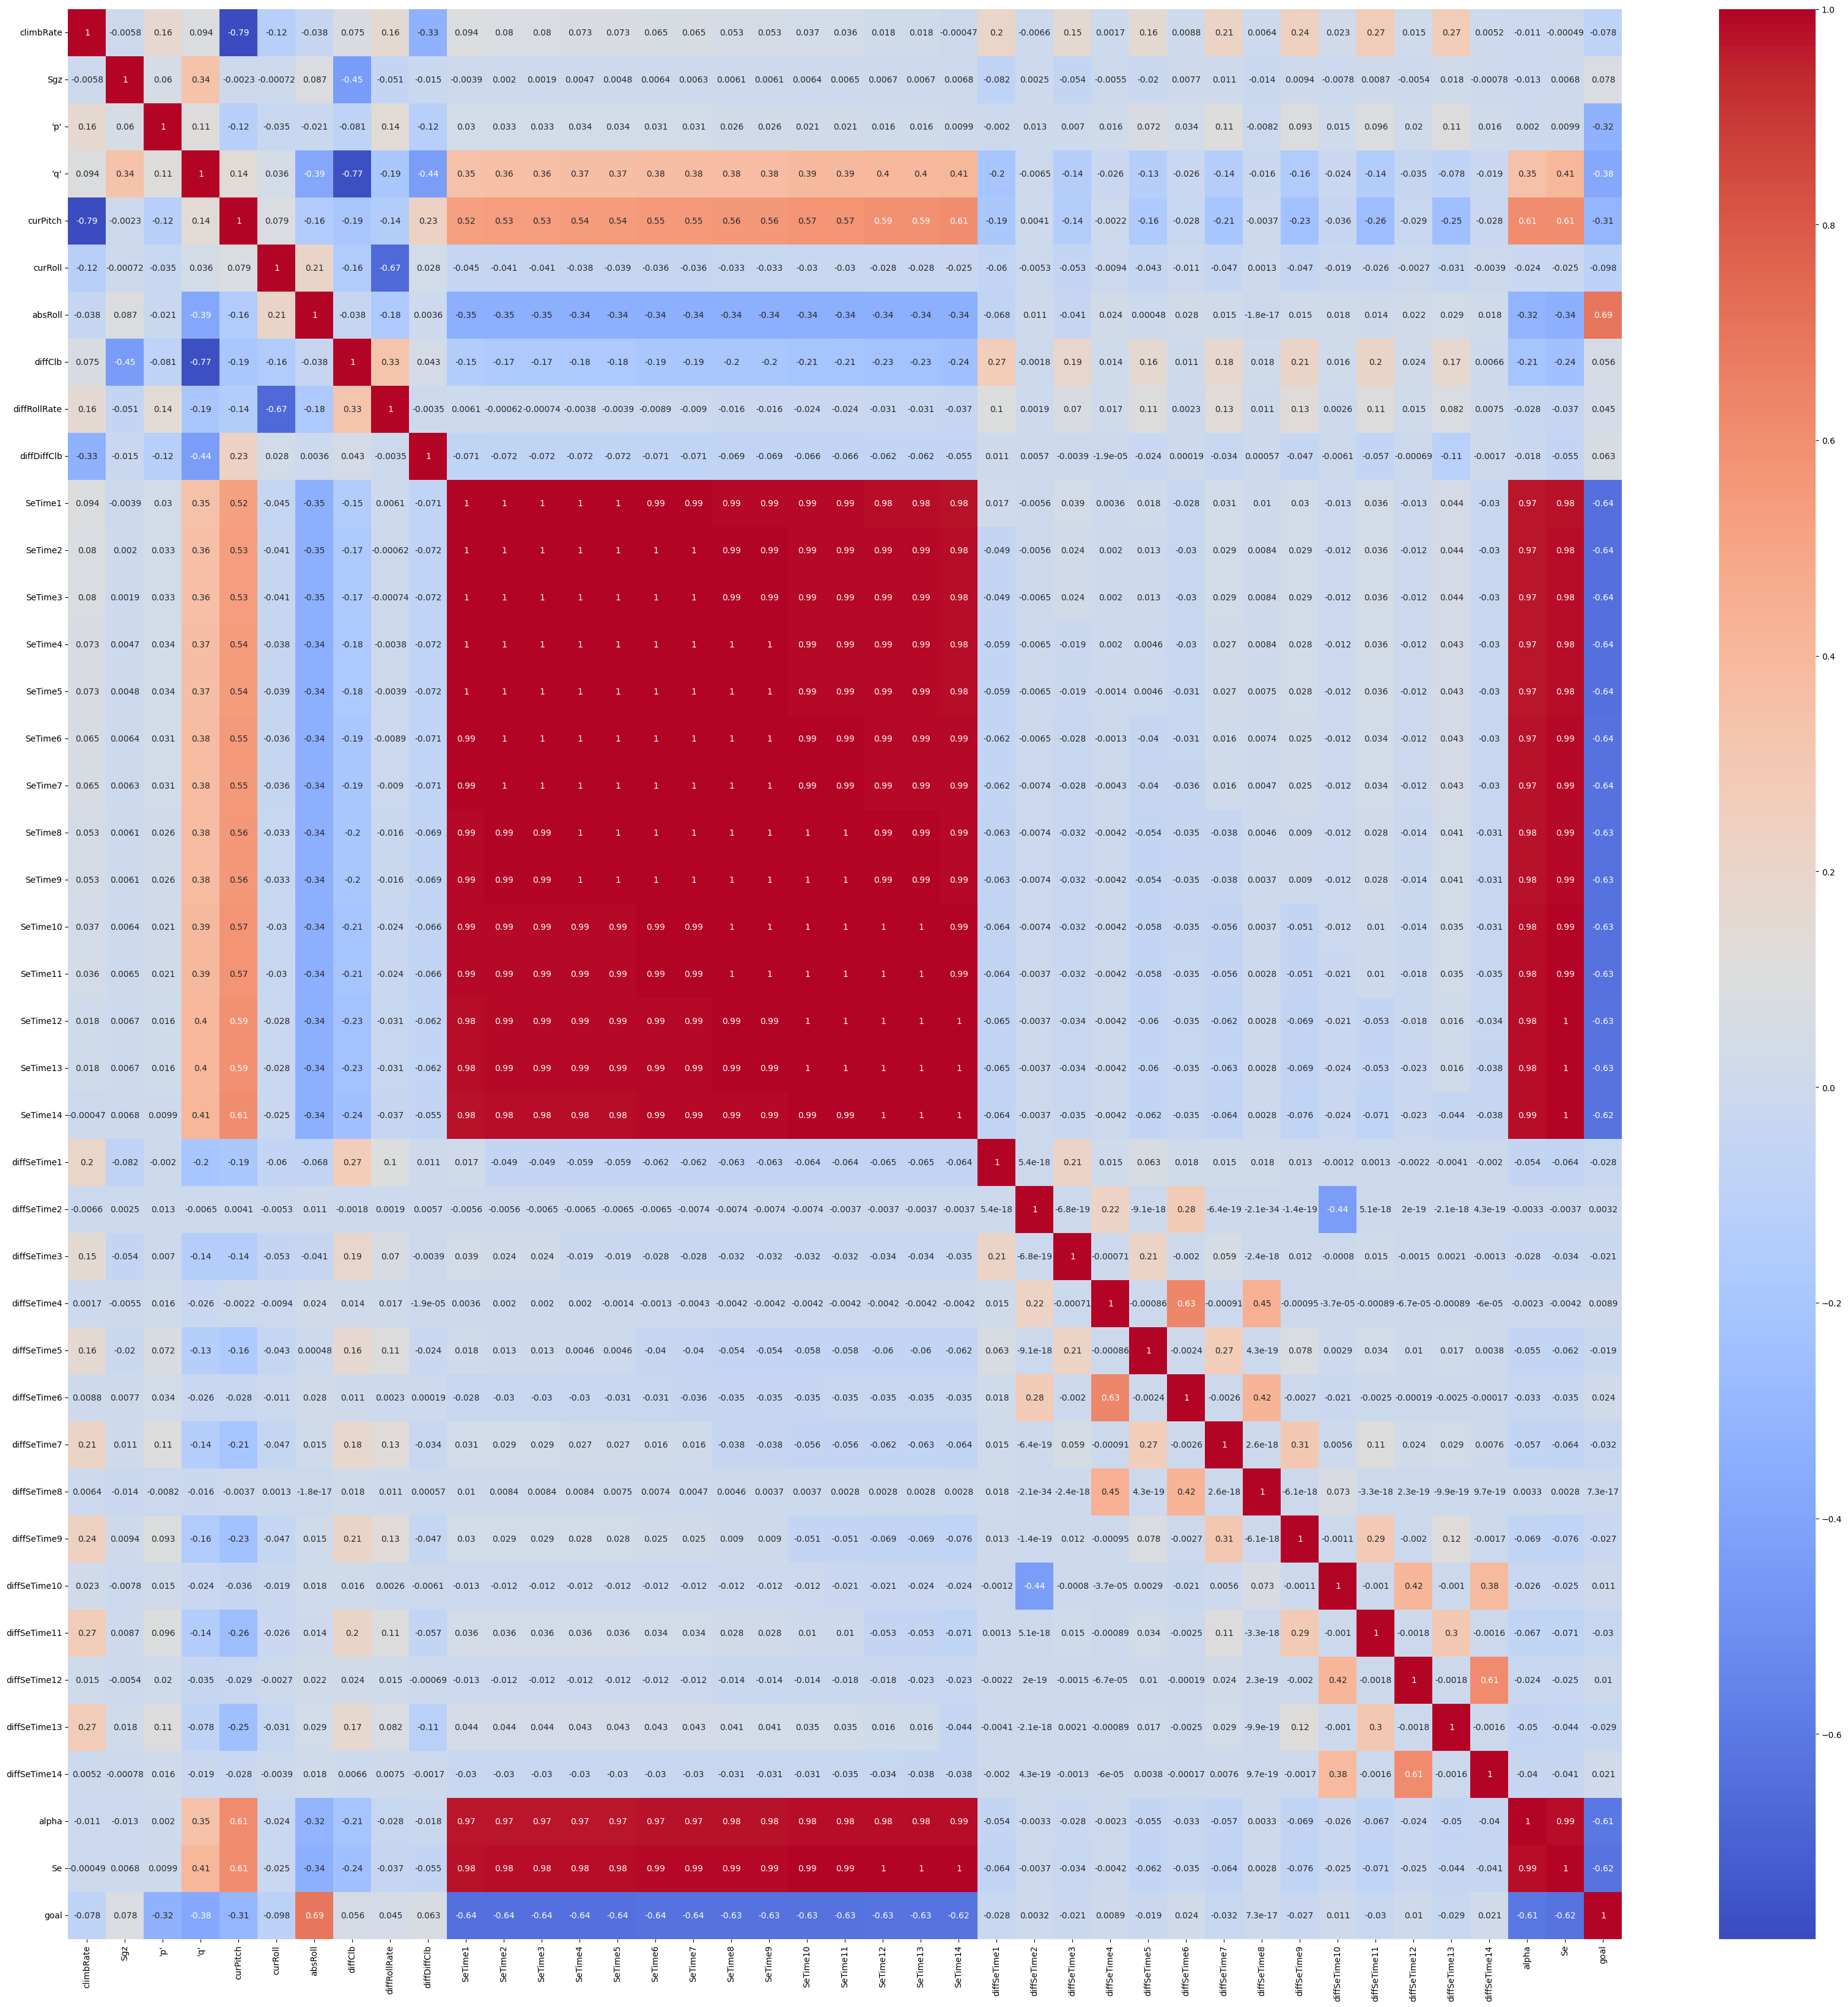

In [9]:
plt.figure(figsize=(41,41))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [10]:
todrop=['SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14','alpha','Se']
dropdf=traindf.drop(todrop,axis=1,inplace=False)
testdf2=testdf.drop(todrop,axis=1,inplace=False)
dropdf.shape

(12212, 26)

<Axes: >

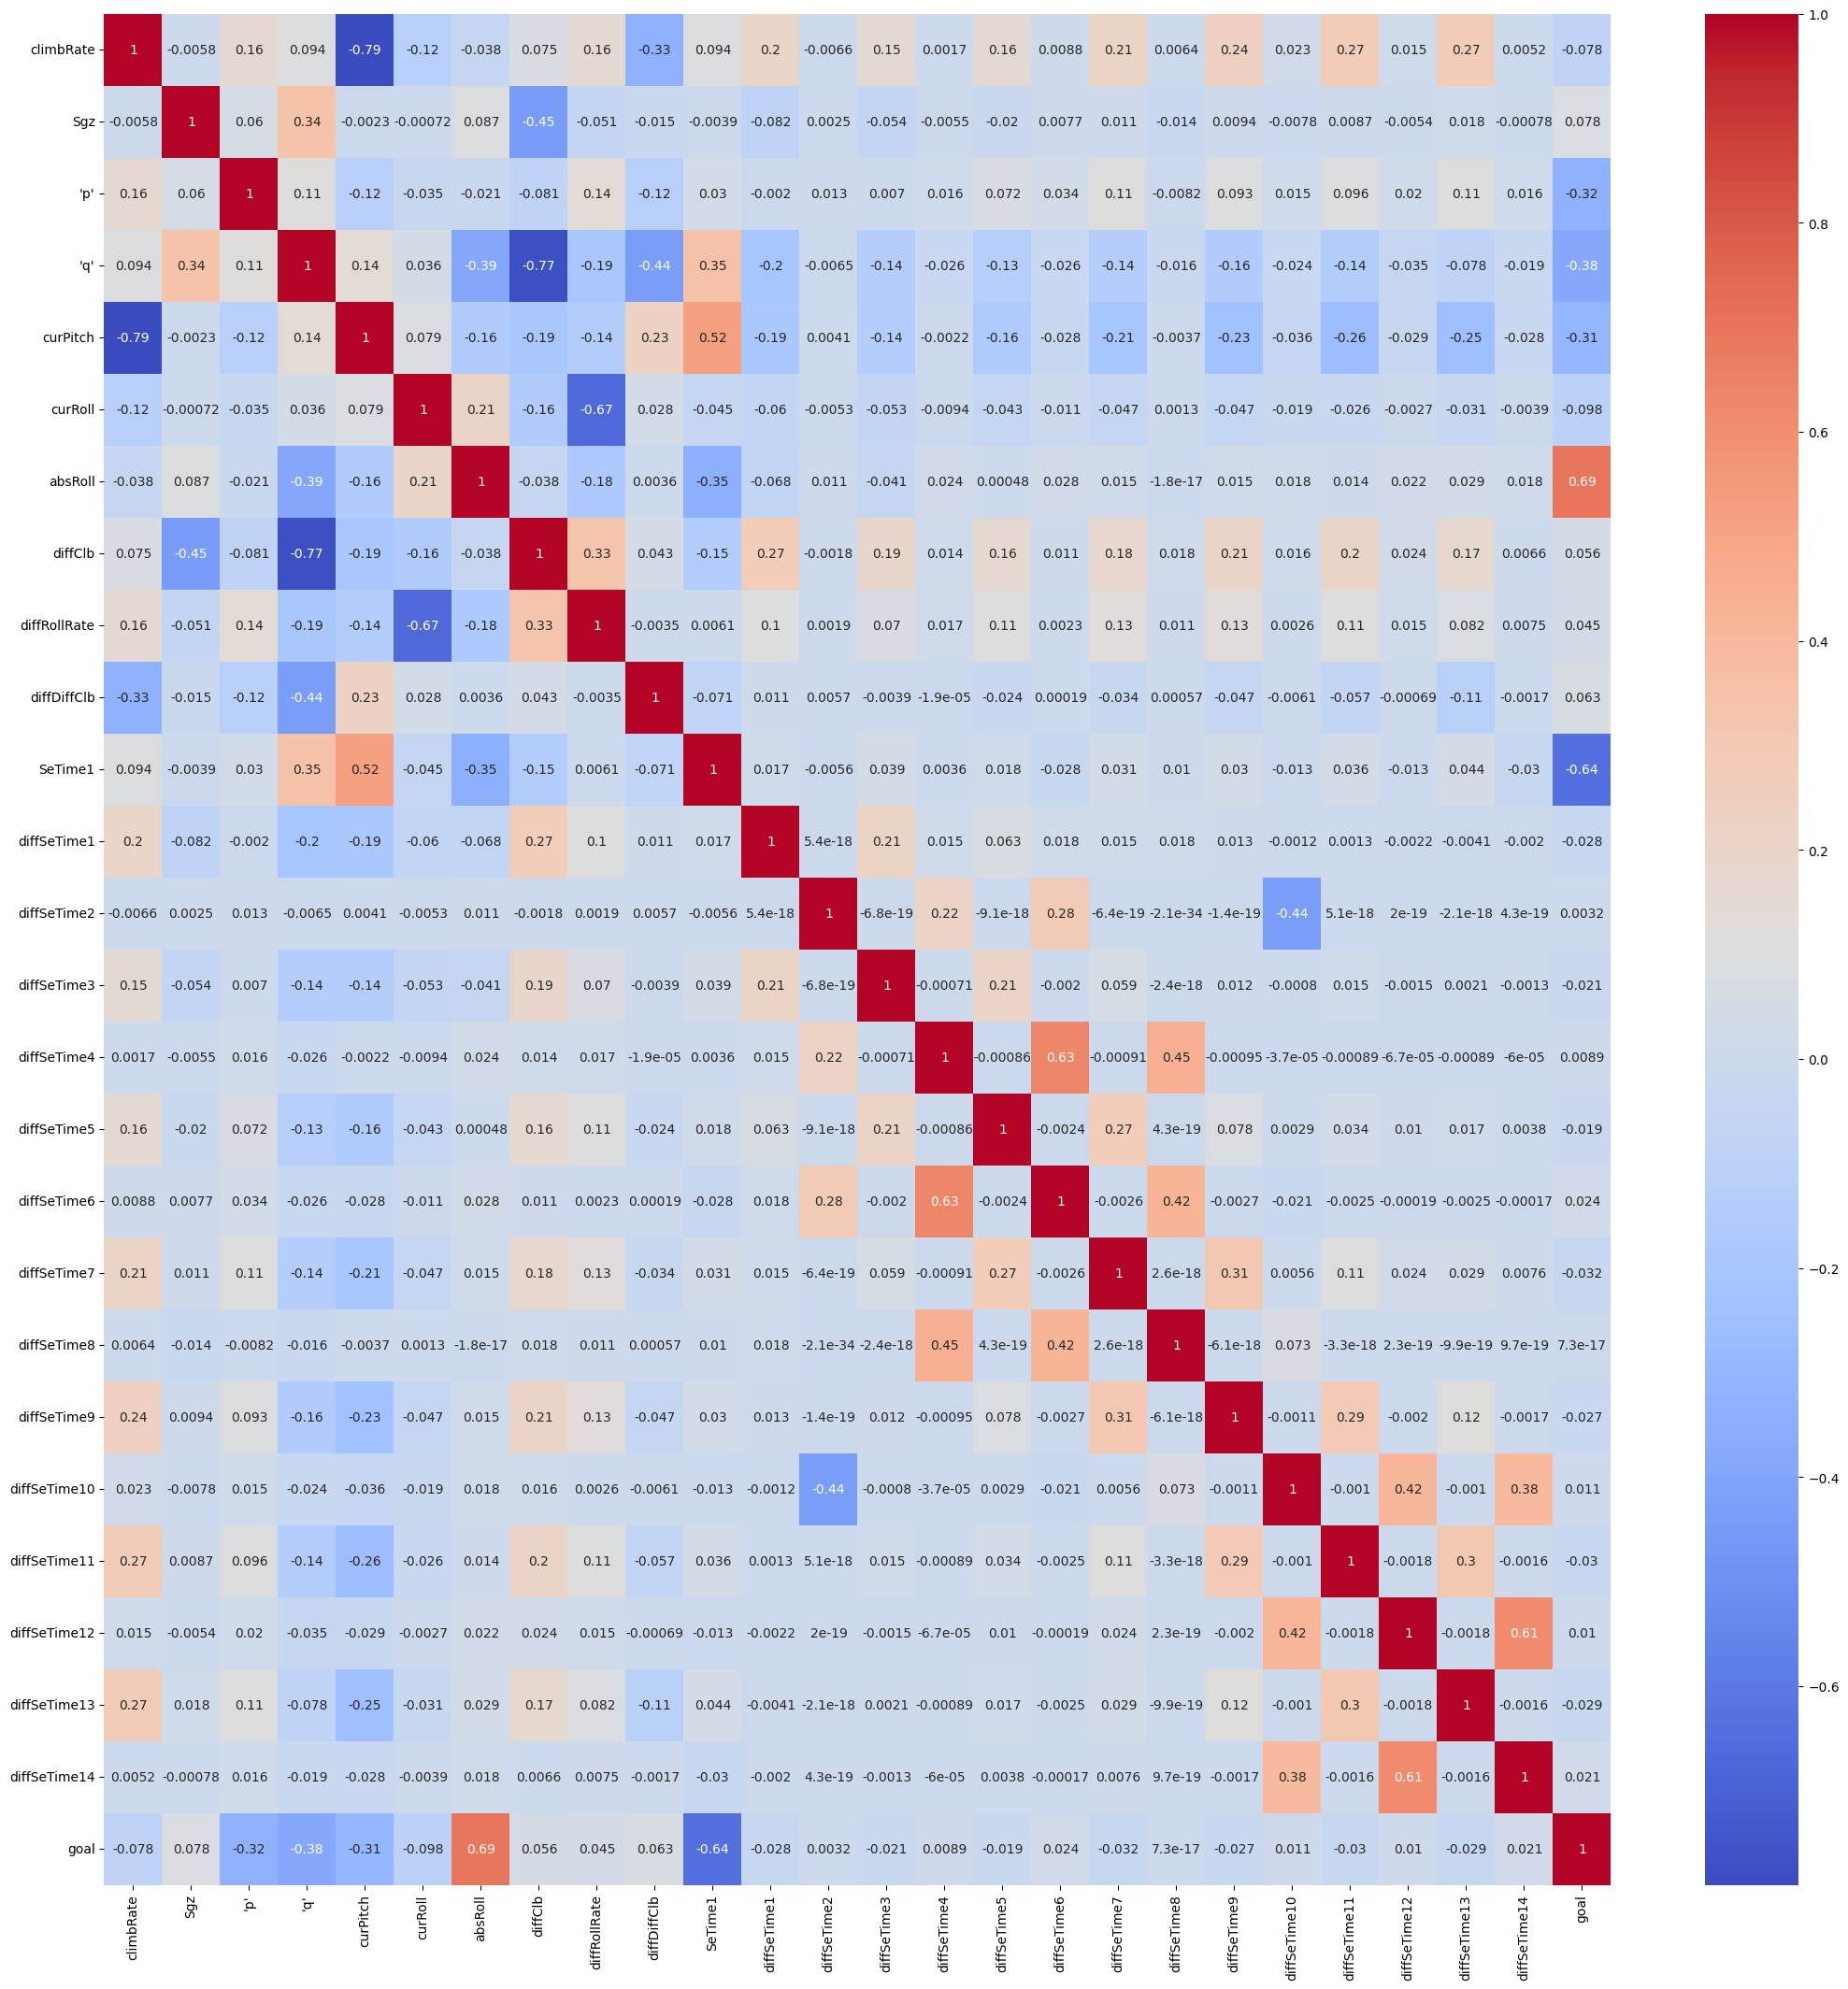

In [11]:
corr2=dropdf.corr()
plt.figure(figsize=(26,26))
sns.heatmap(corr2,cmap='coolwarm',annot=True)

In [12]:
dropcol=dropdf.columns
dropdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12212 non-null  int64  
 1   Sgz           12210 non-null  float64
 2   'p'           12211 non-null  float64
 3   'q'           12210 non-null  float64
 4   curPitch      12210 non-null  float64
 5   curRoll       12212 non-null  float64
 6   absRoll       12212 non-null  int64  
 7   diffClb       12204 non-null  float64
 8   diffRollRate  12209 non-null  float64
 9   diffDiffClb   12211 non-null  float64
 10  SeTime1       12210 non-null  float64
 11  diffSeTime1   12210 non-null  float64
 12  diffSeTime2   12207 non-null  float64
 13  diffSeTime3   12210 non-null  float64
 14  diffSeTime4   12207 non-null  float64
 15  diffSeTime5   12209 non-null  float64
 16  diffSeTime6   12211 non-null  float64
 17  diffSeTime7   12209 non-null  float64
 18  diffSeTime8   12209 non-nu

In [13]:
dropdf.dropna(inplace=True)
dropdf.isnull().sum()

climbRate       0
Sgz             0
'p'             0
'q'             0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
goal            0
dtype: int64

In [14]:
testdf2=testdf.drop(todrop,axis=1,inplace=False)   

In [15]:
testdf2.shape

(1538, 25)

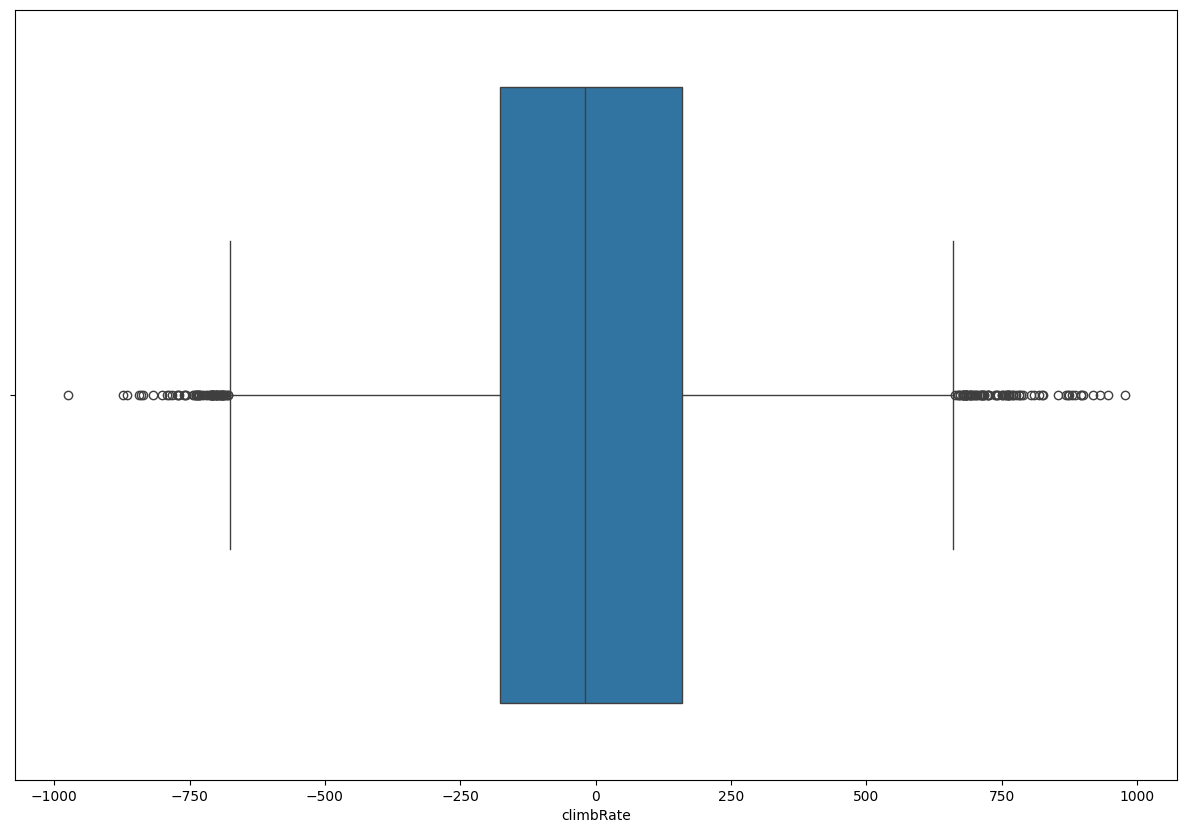

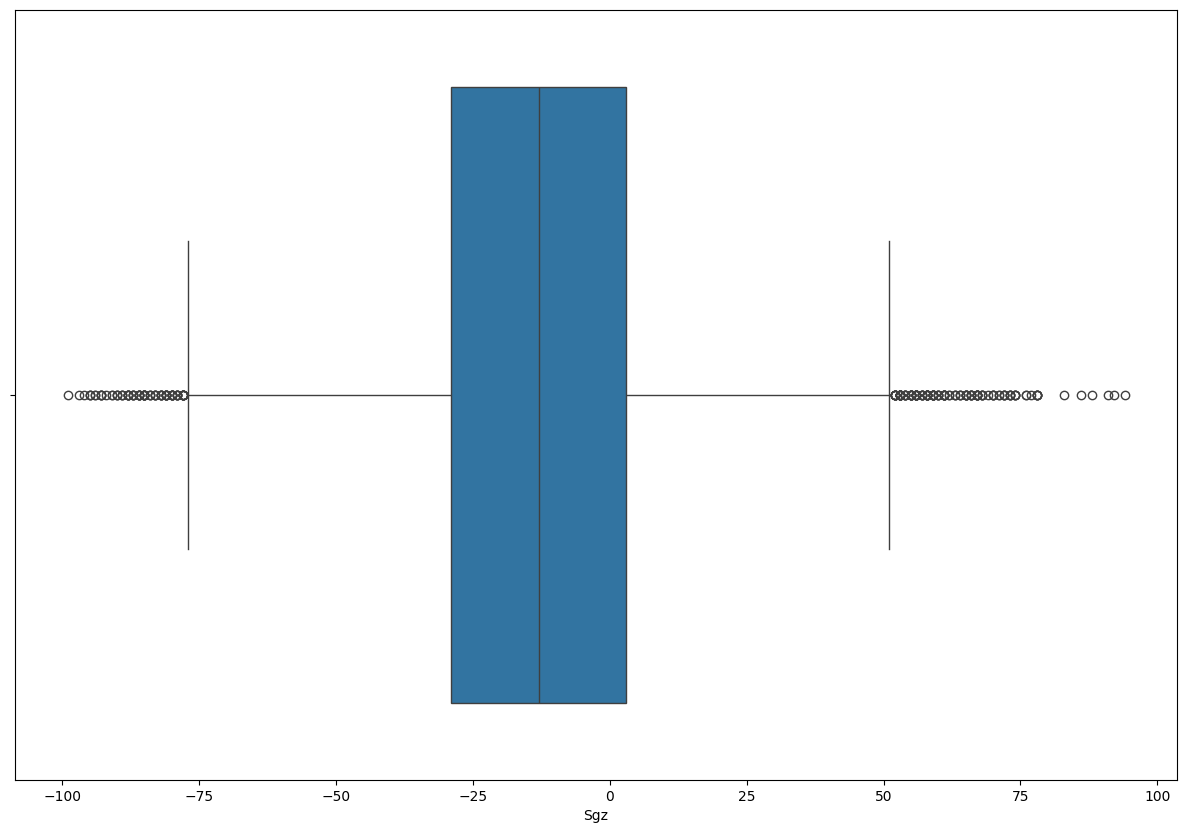

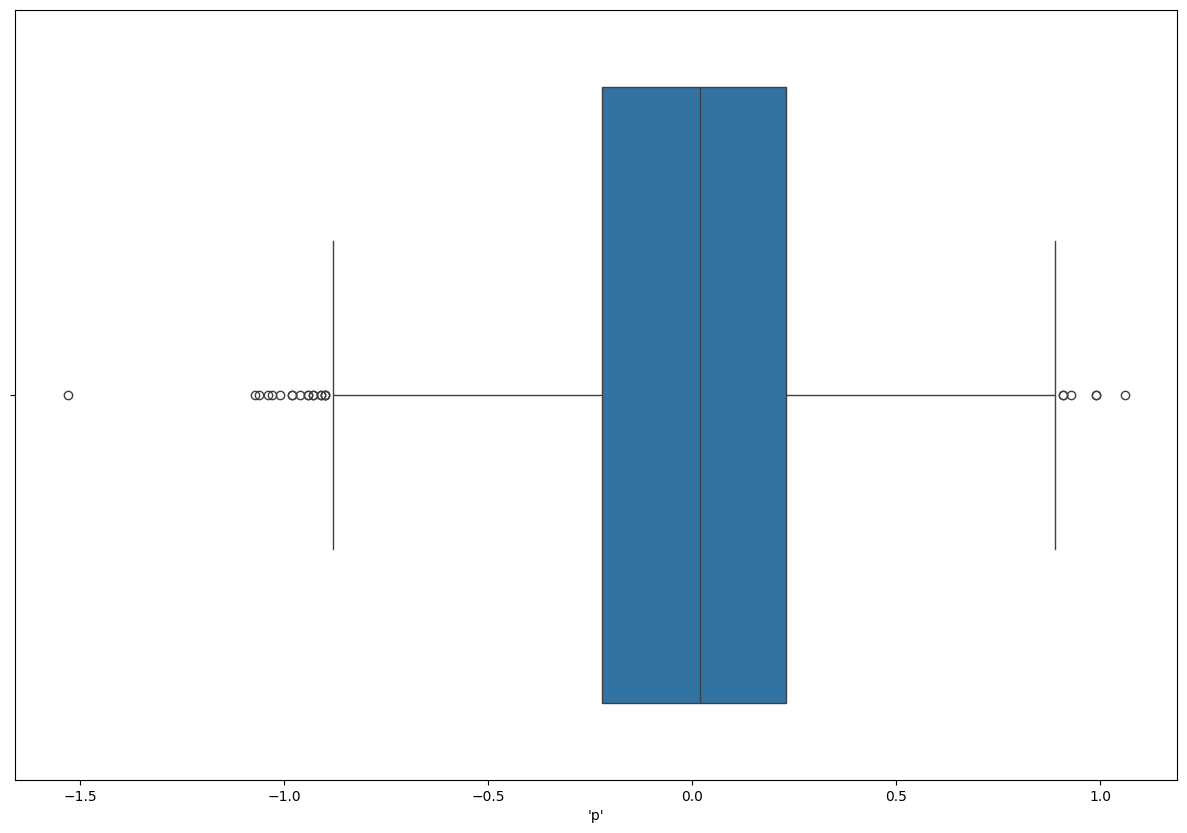

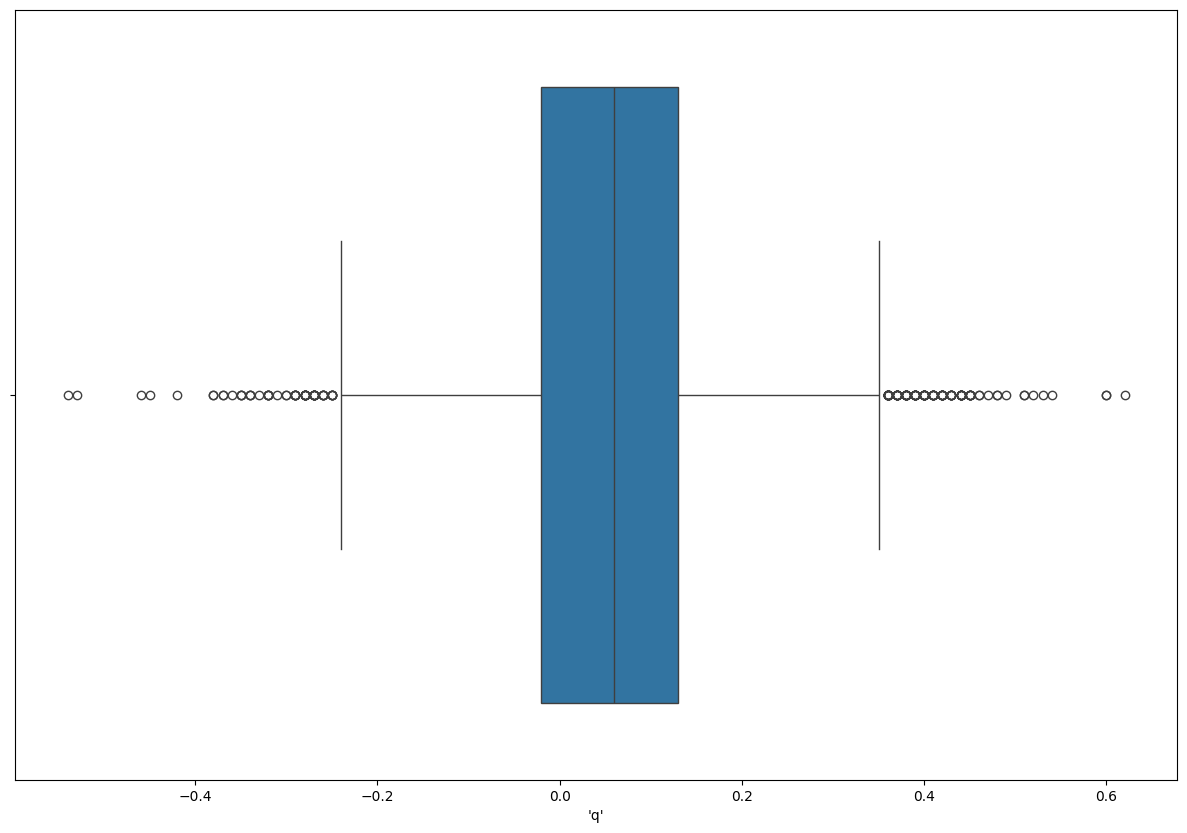

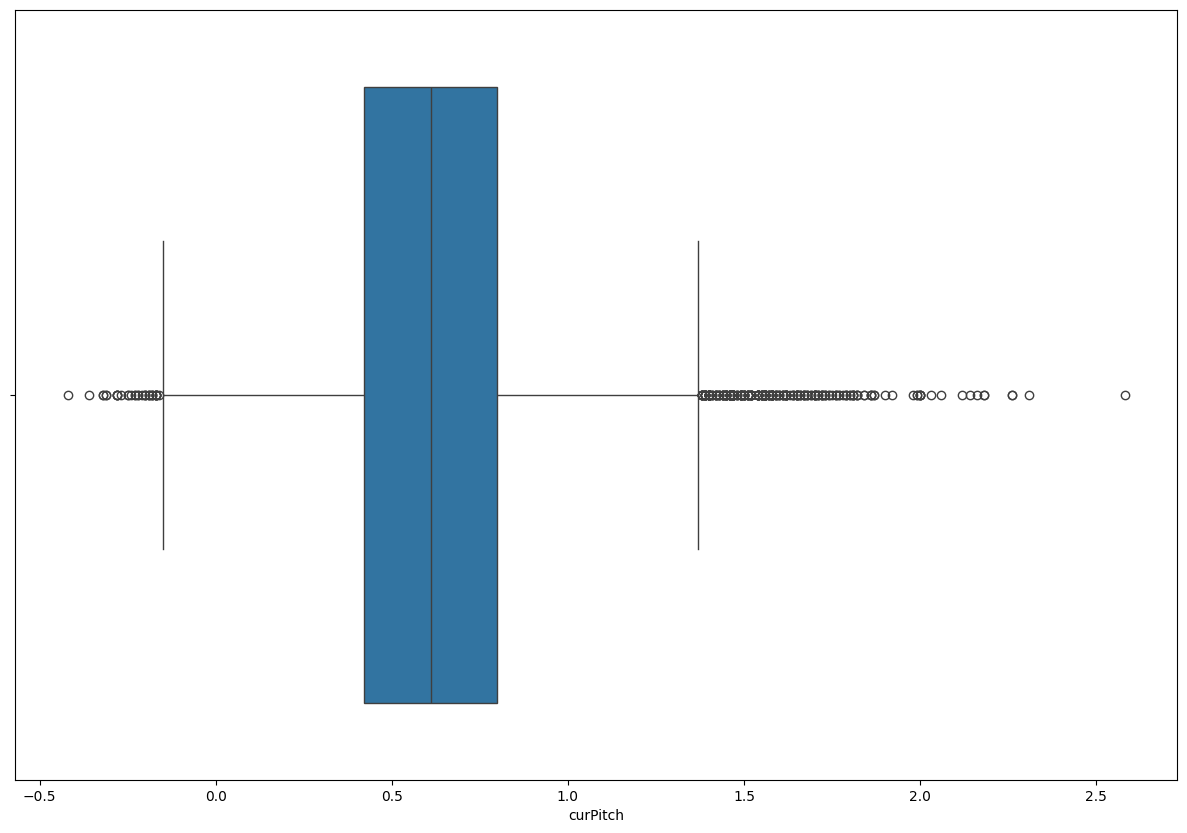

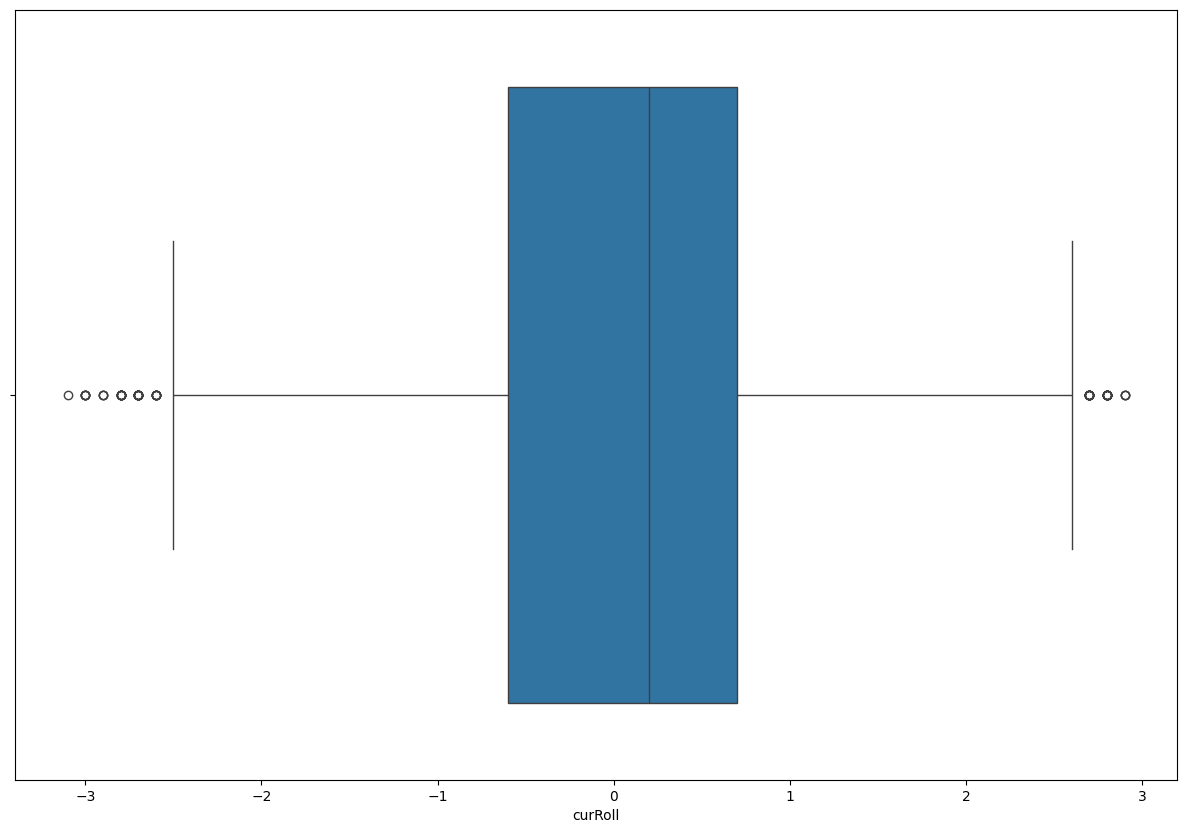

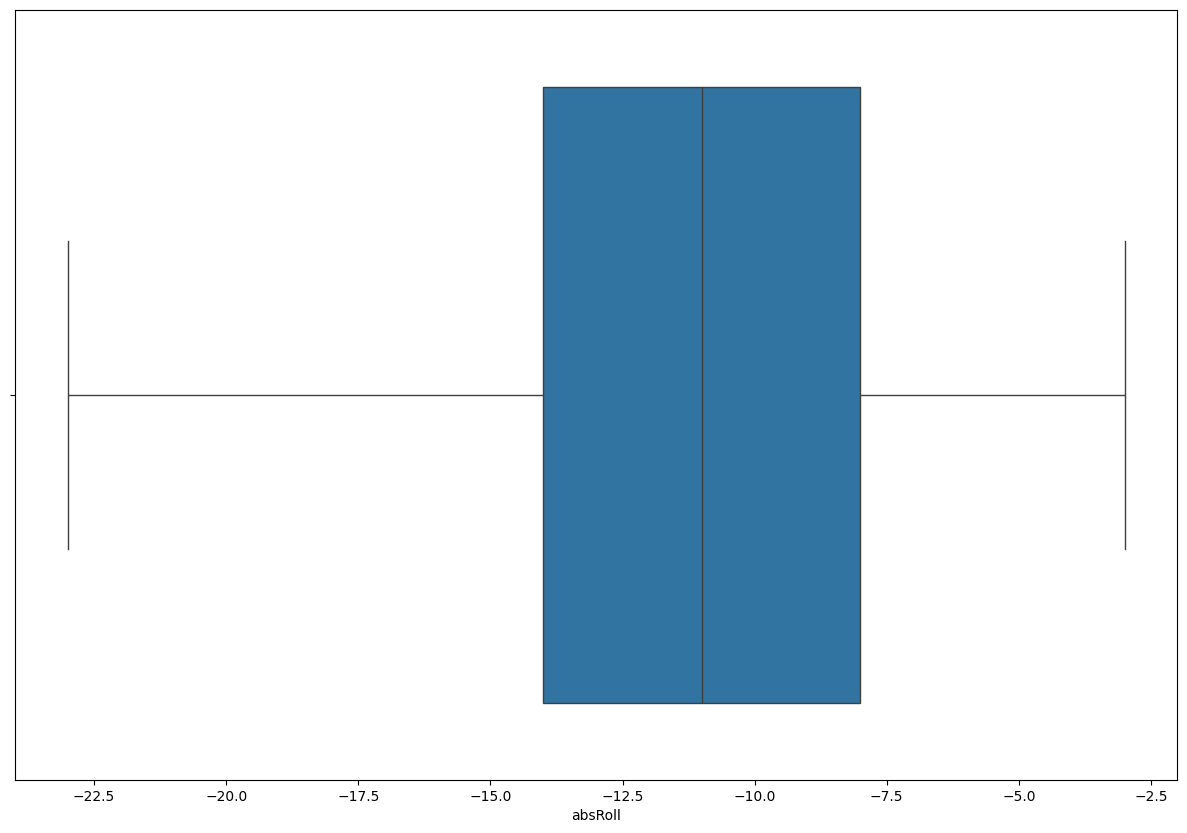

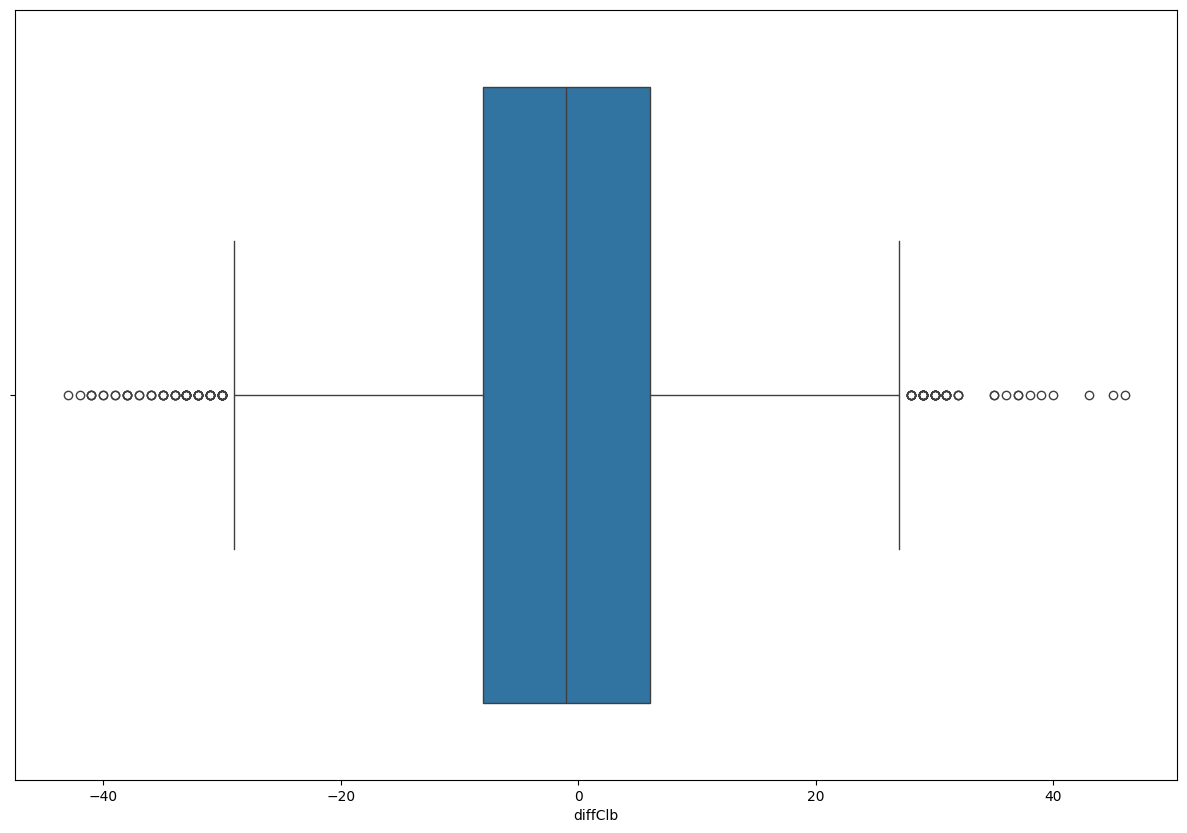

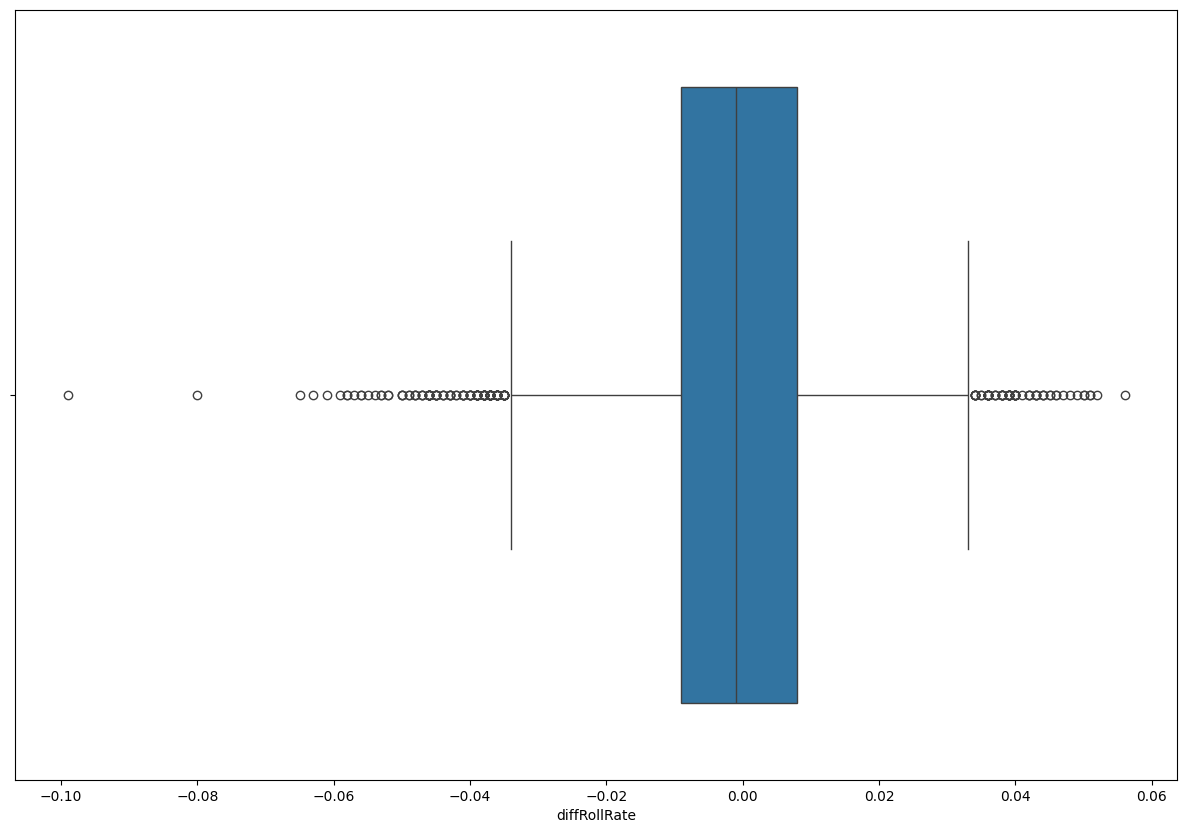

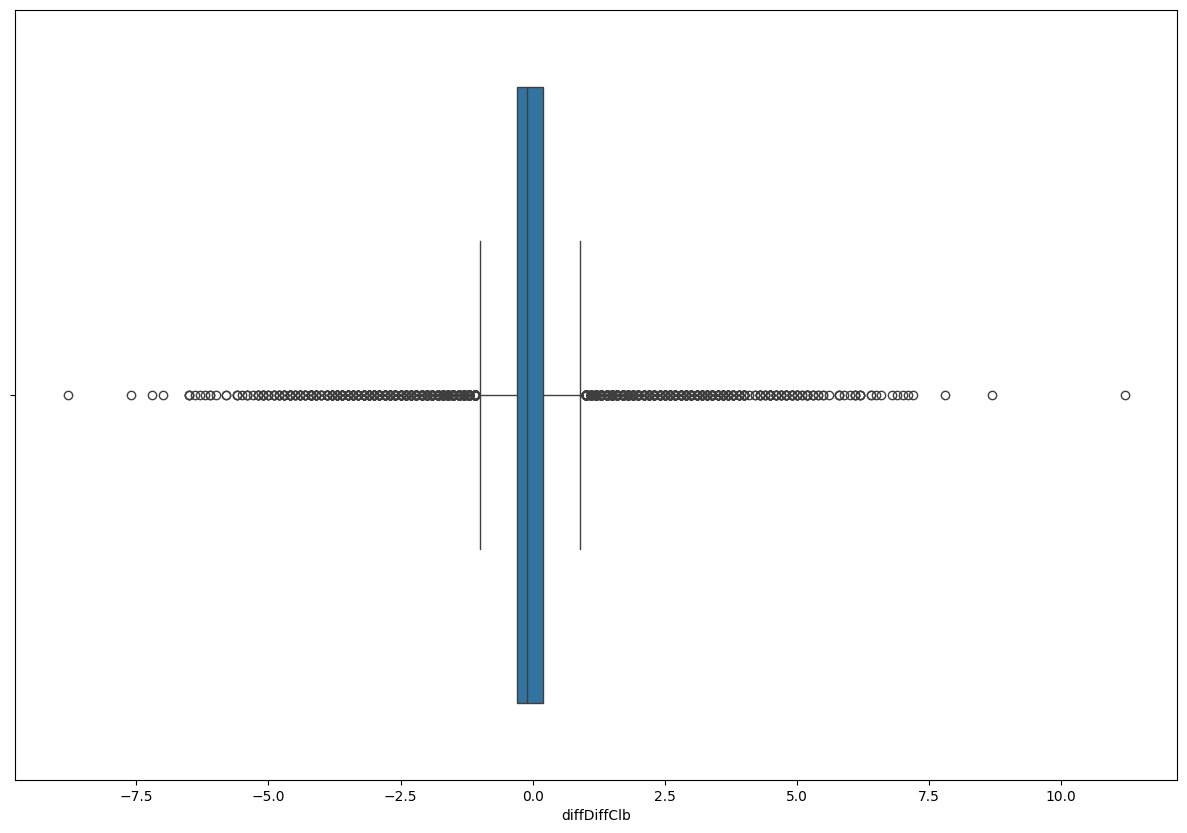

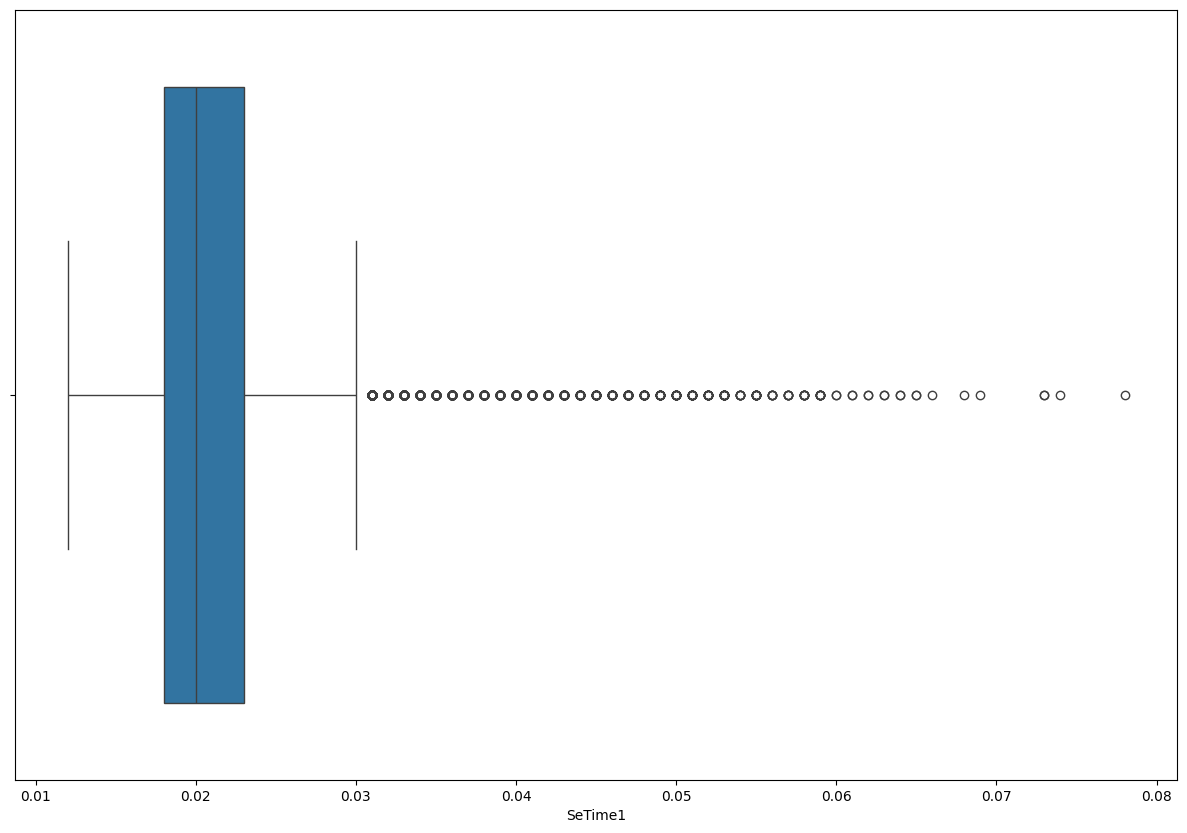

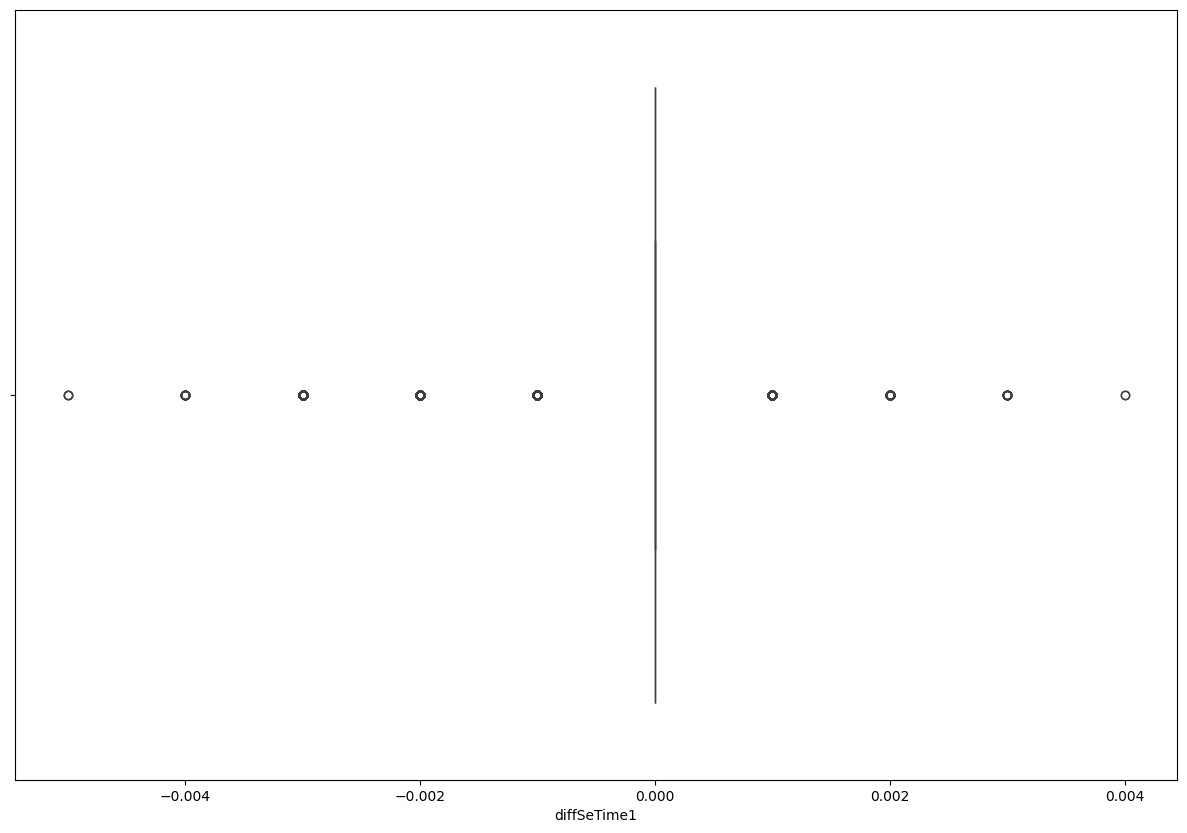

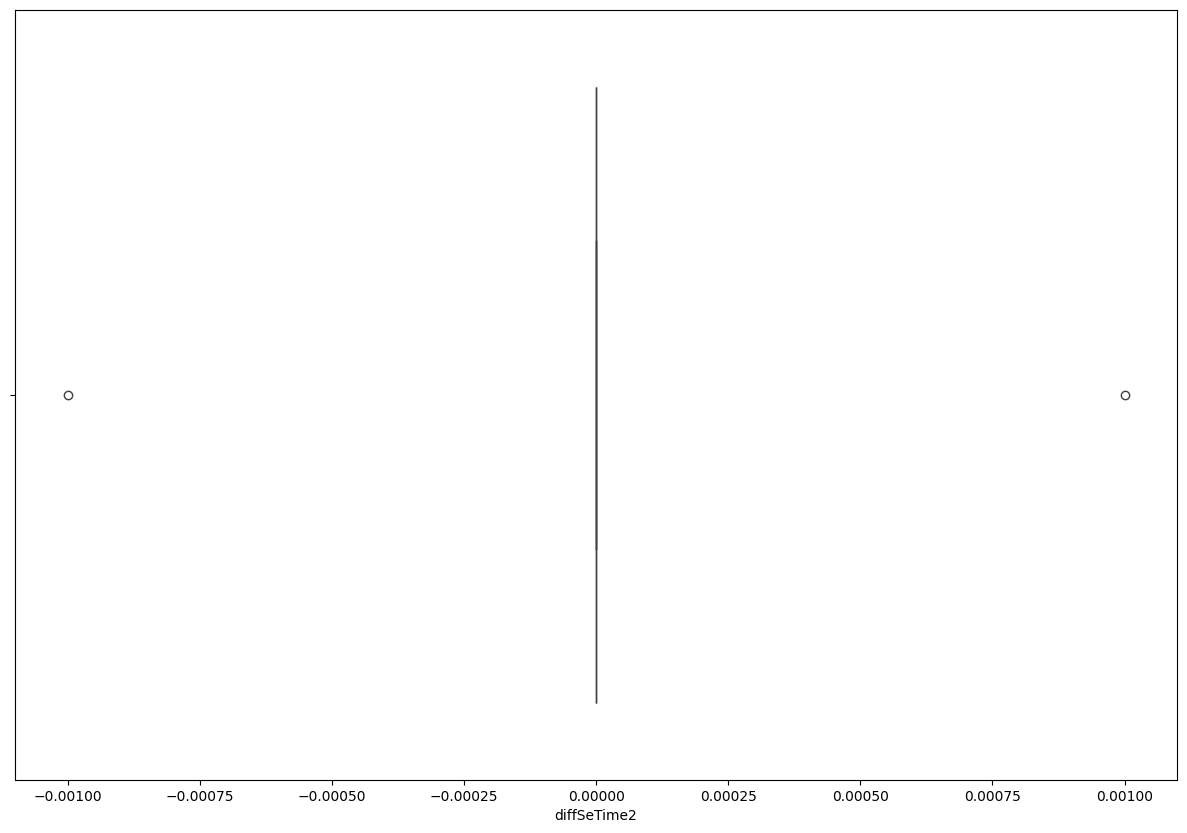

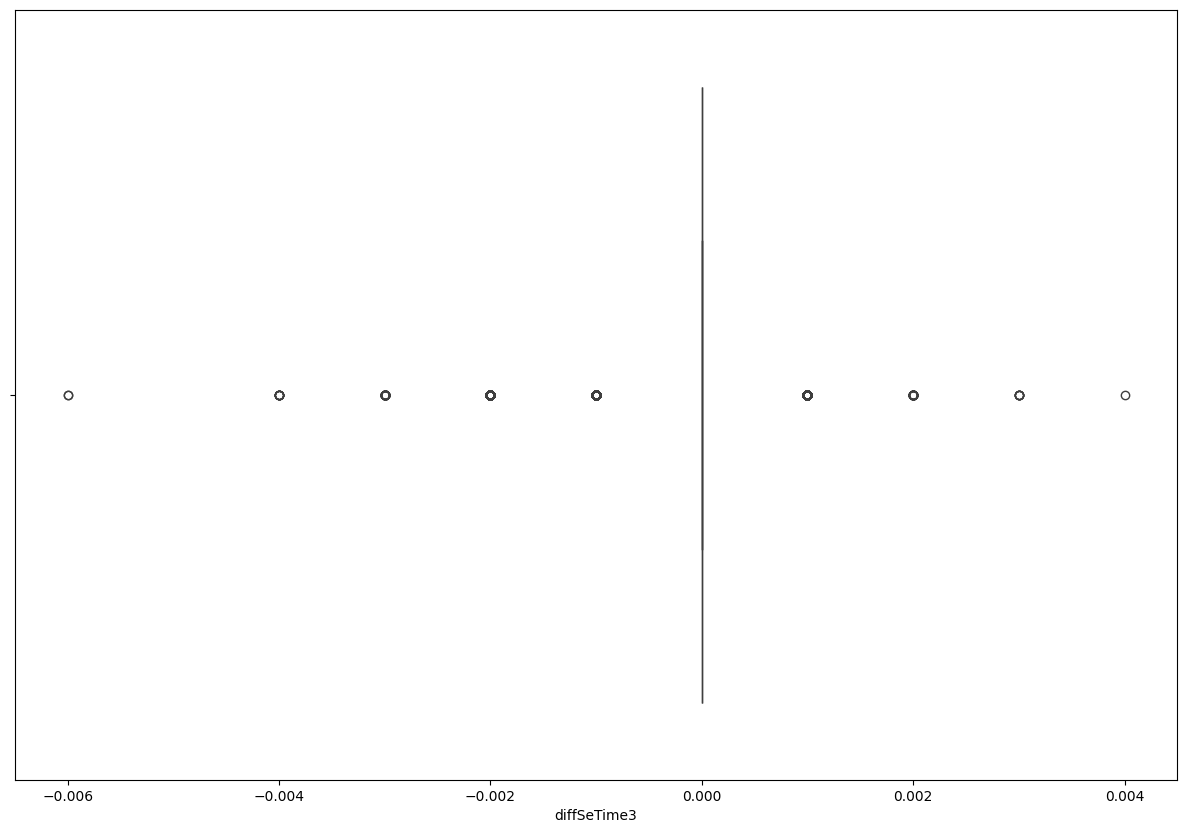

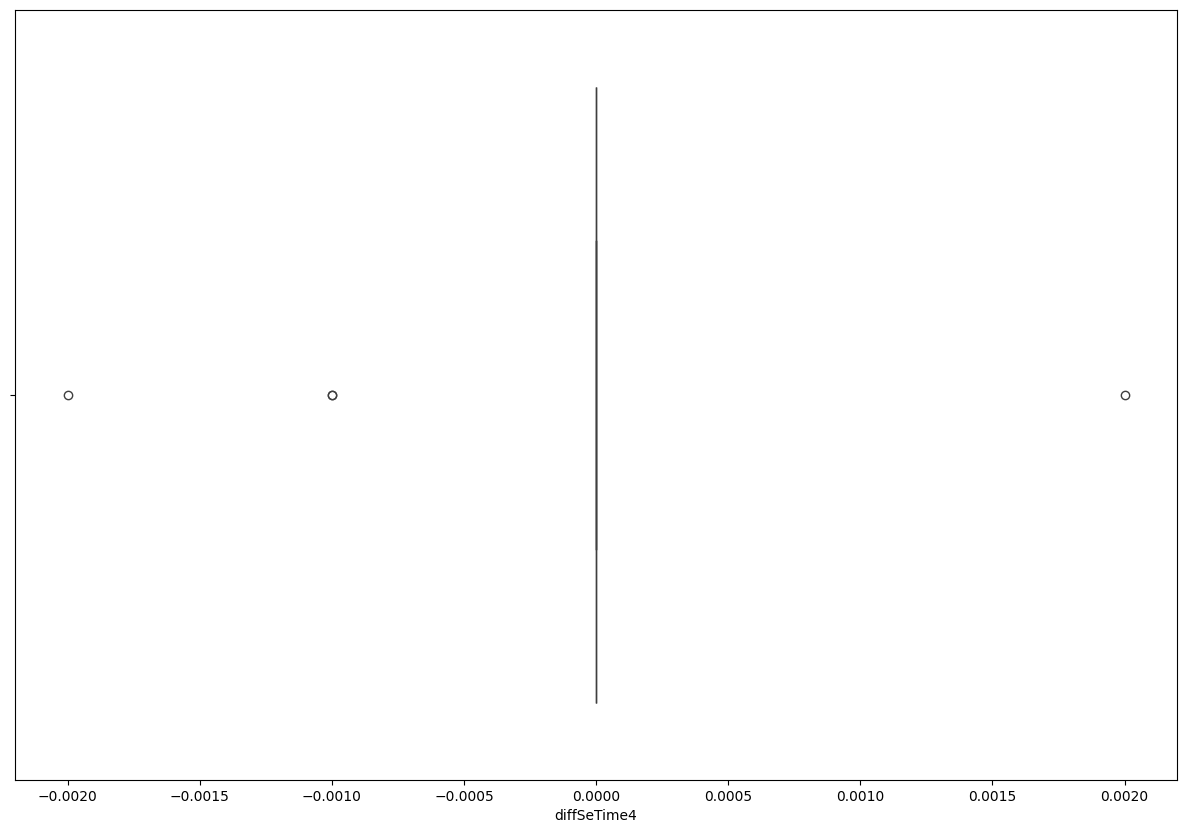

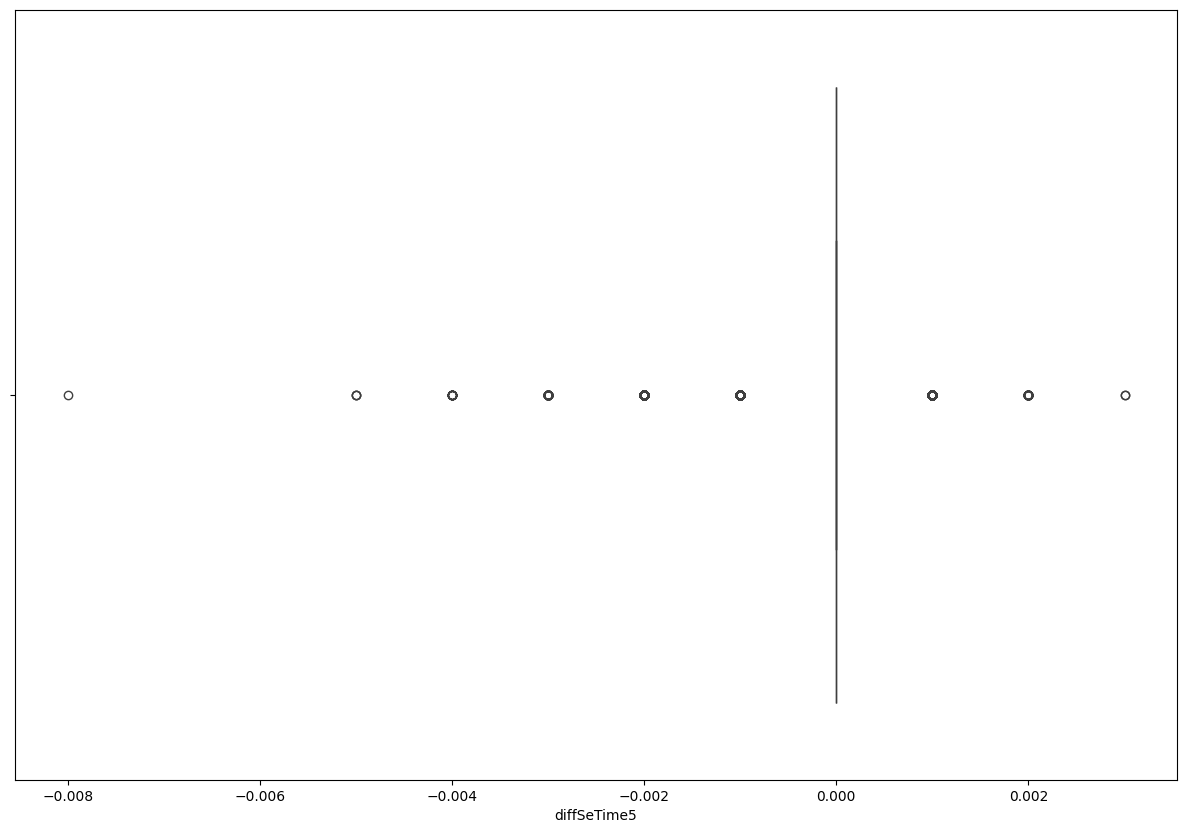

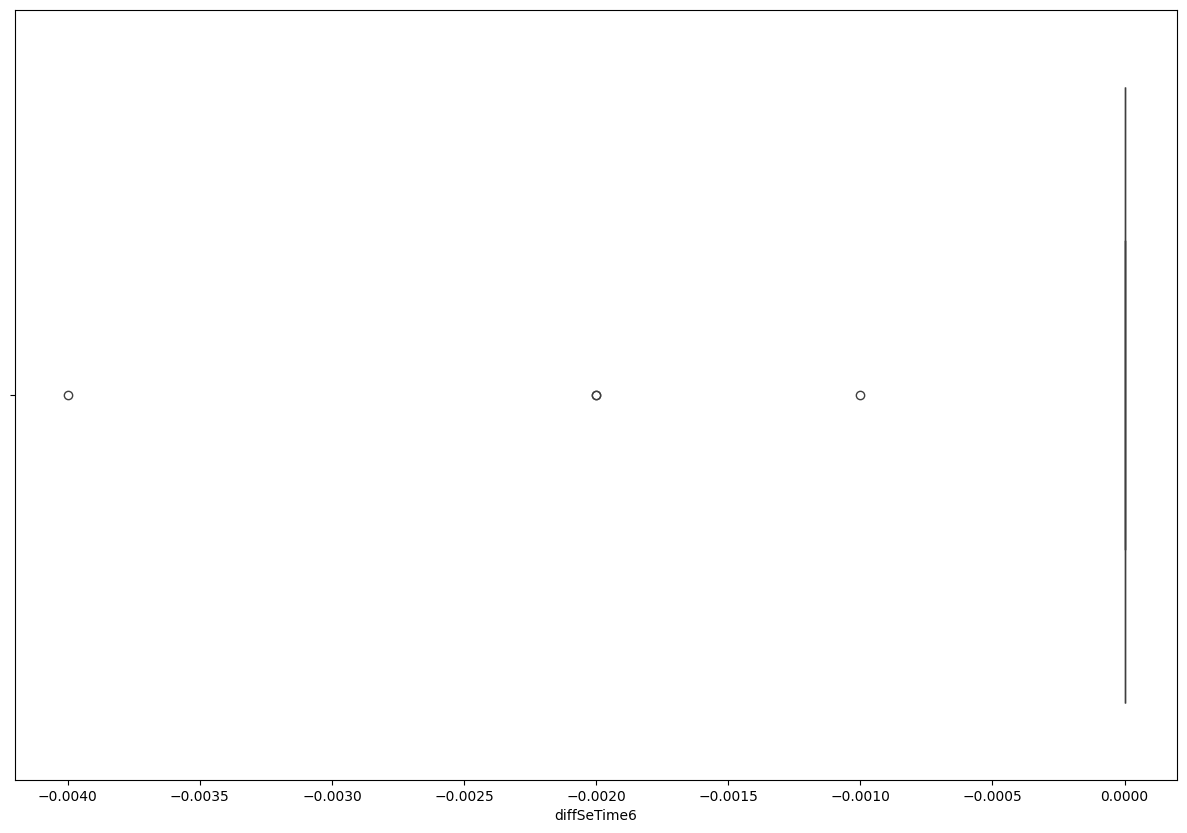

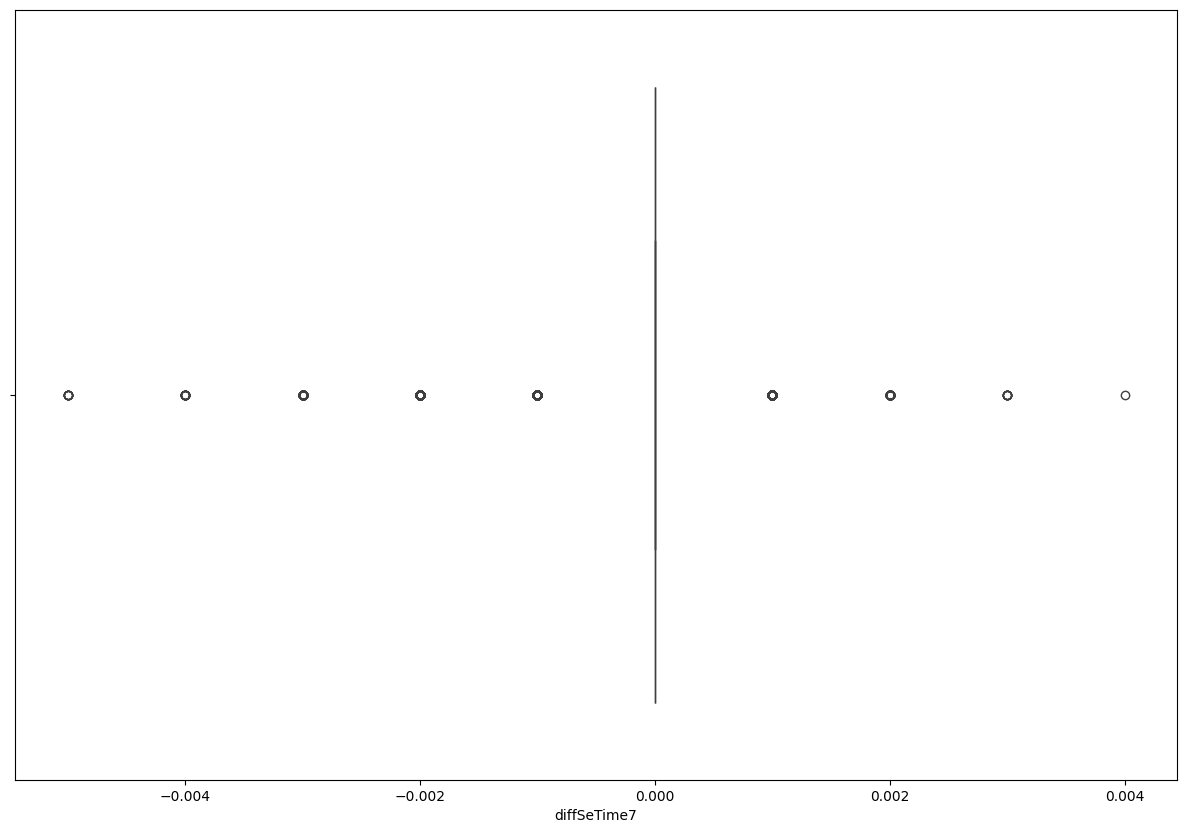

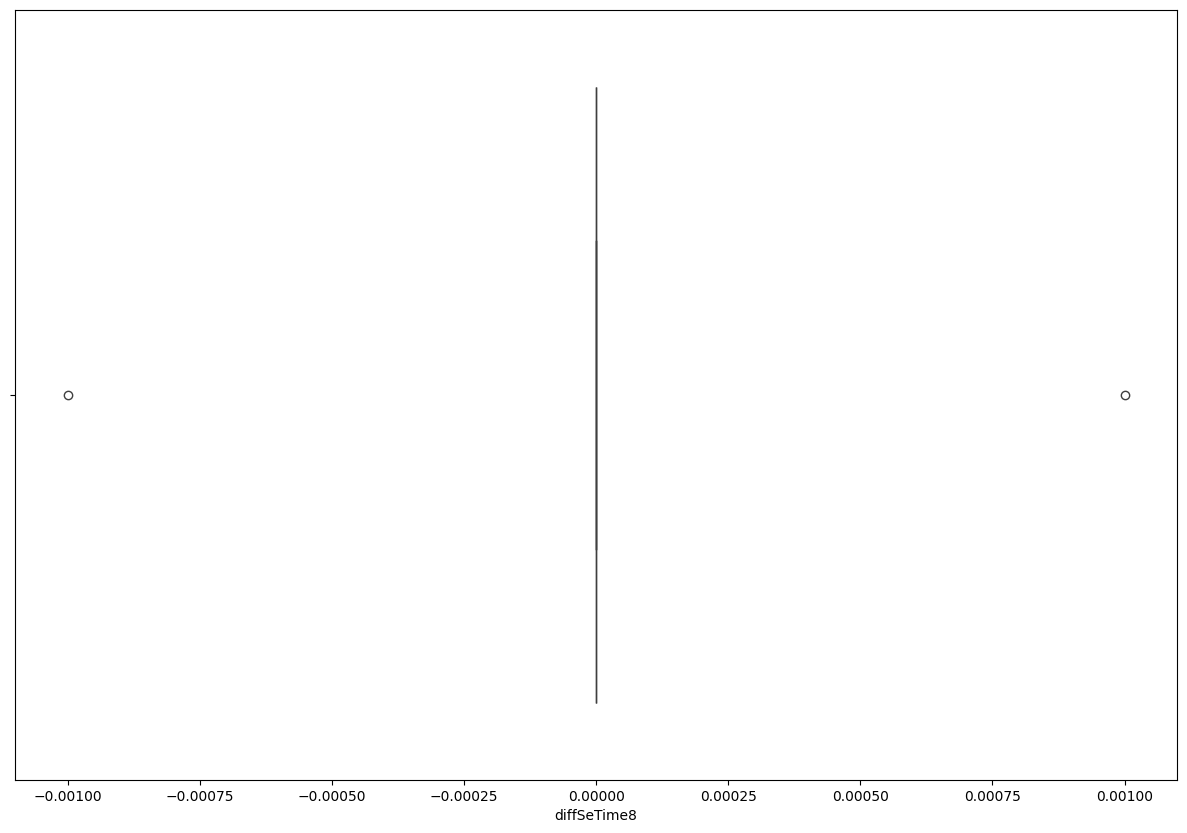

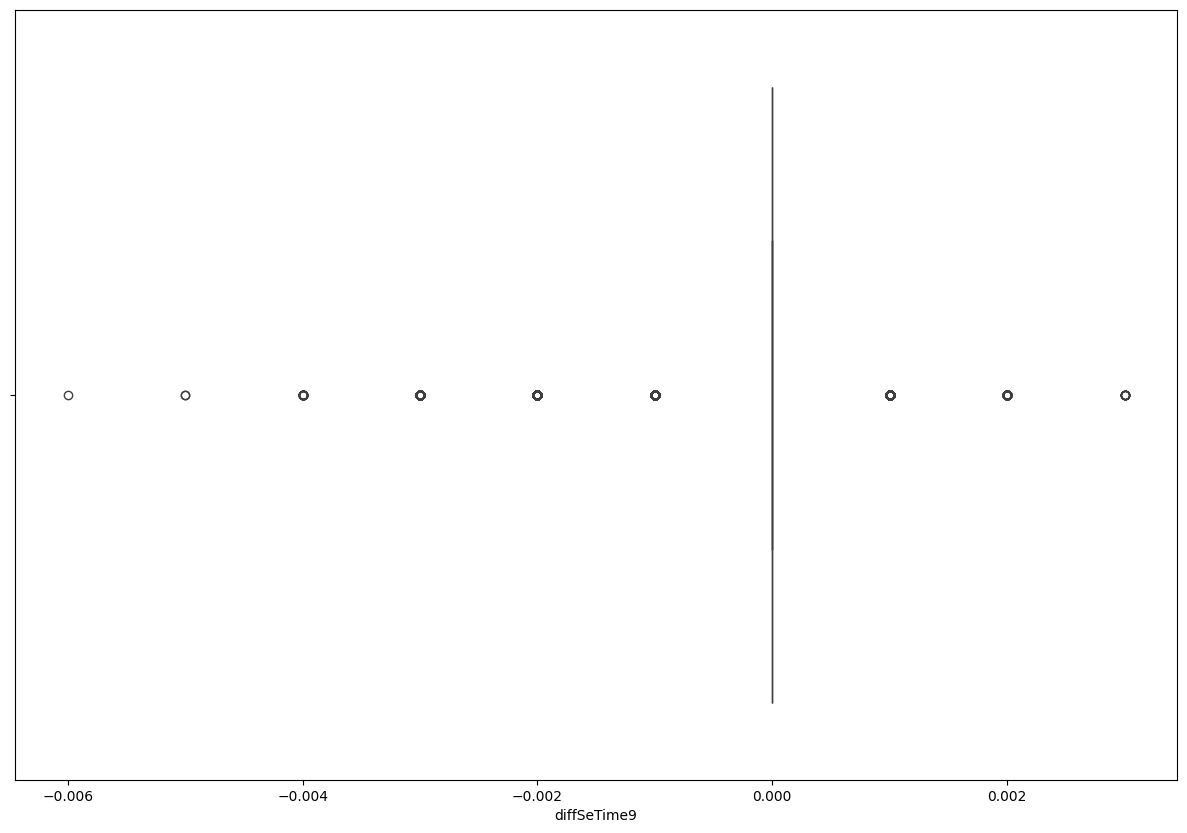

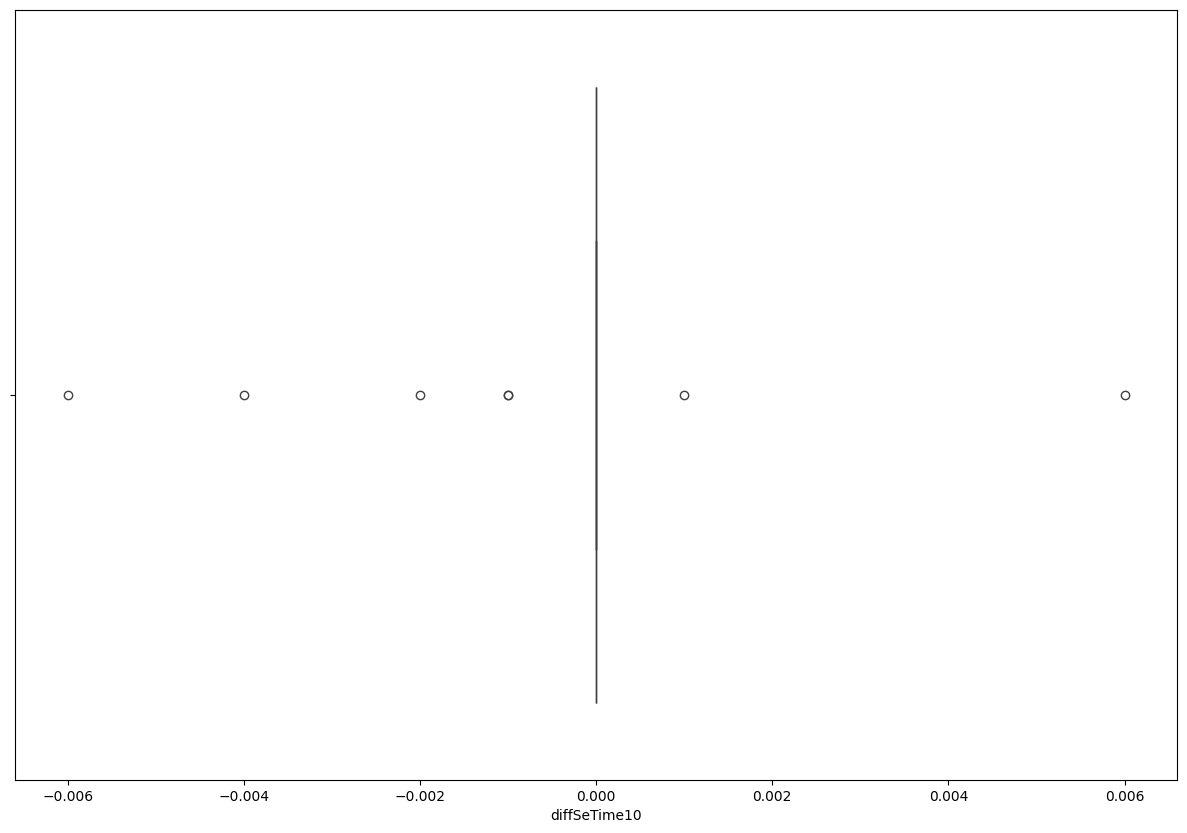

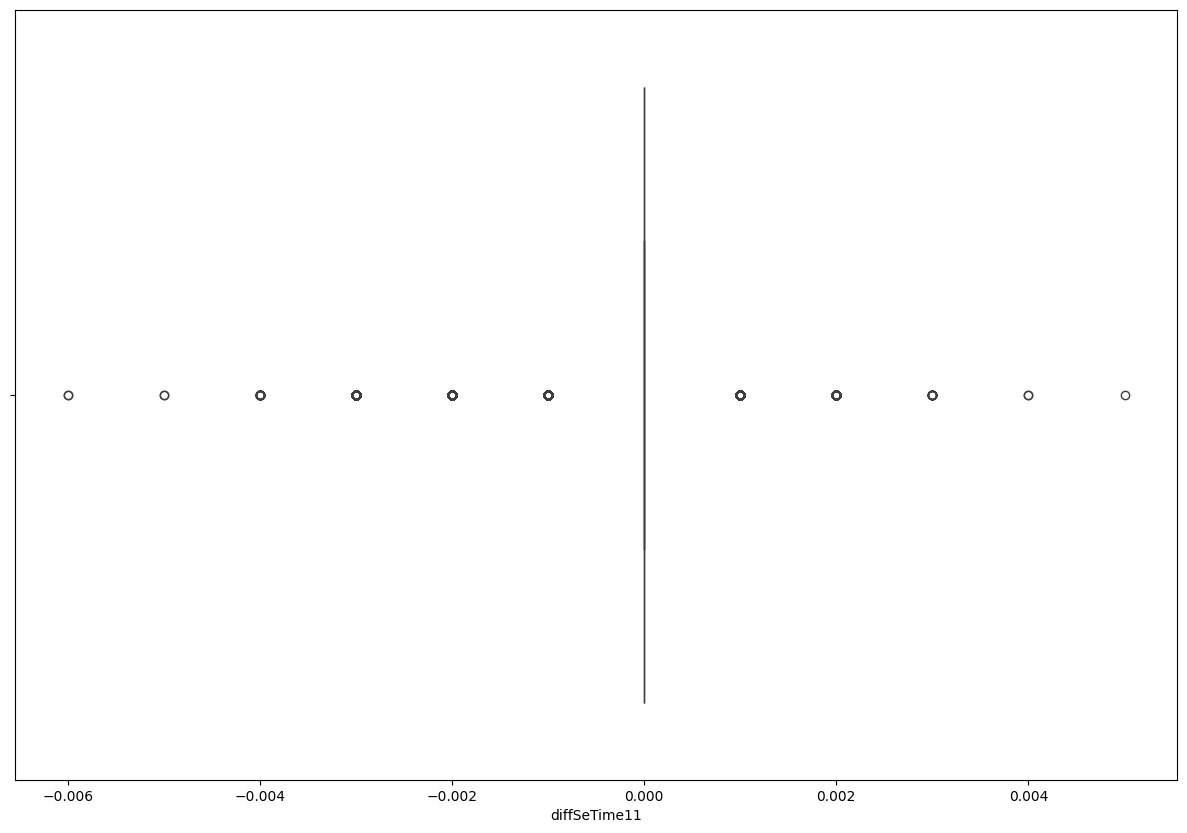

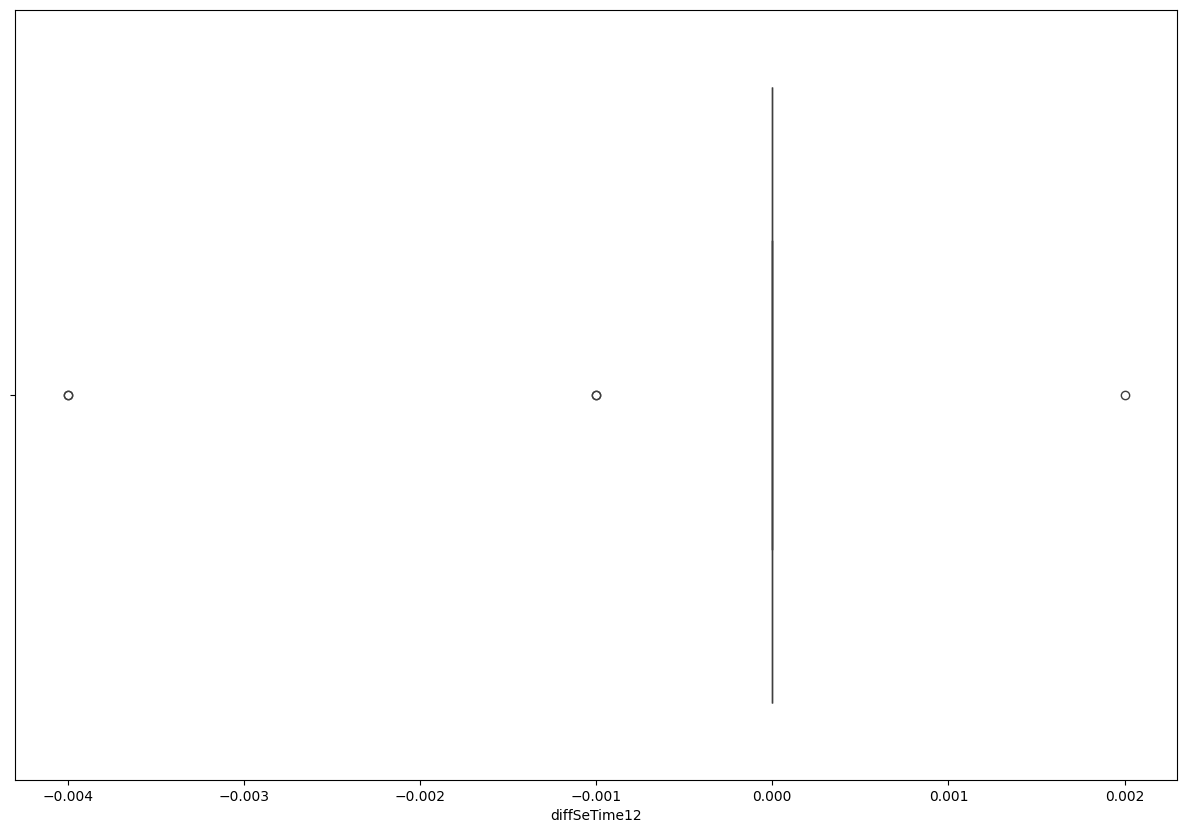

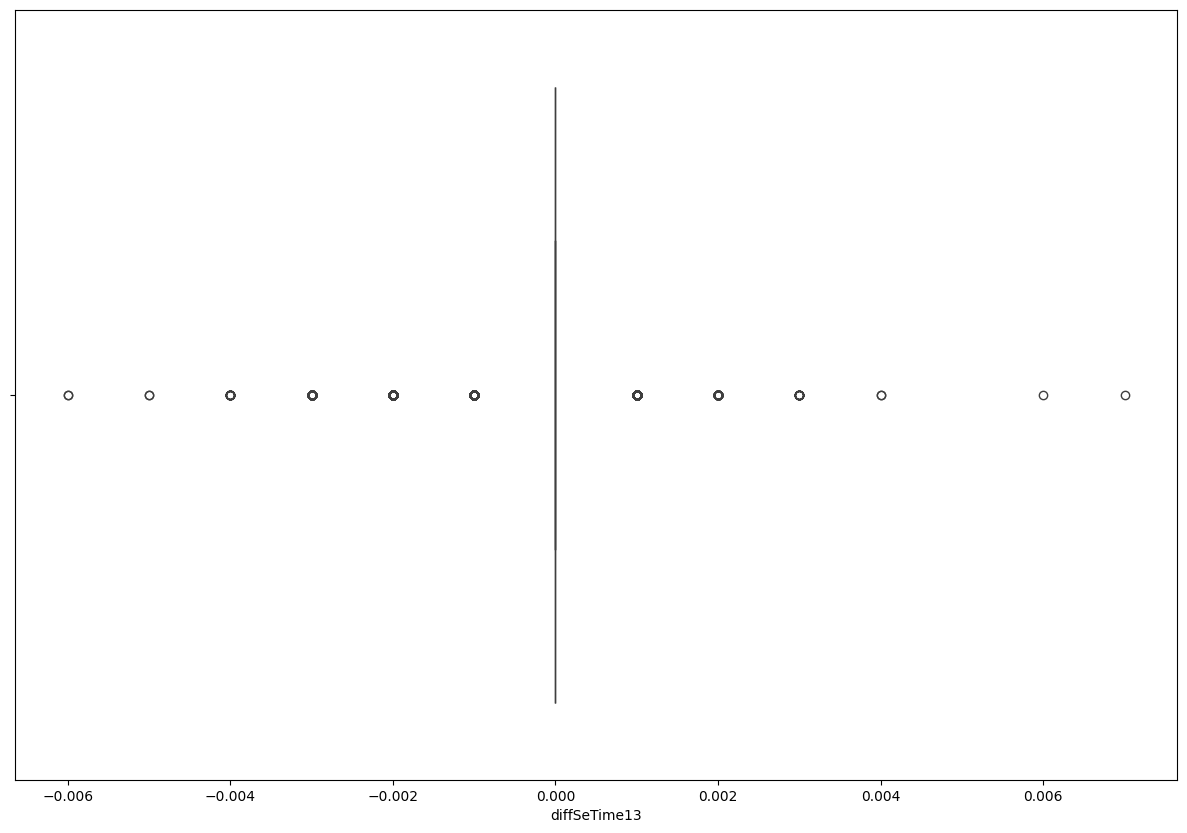

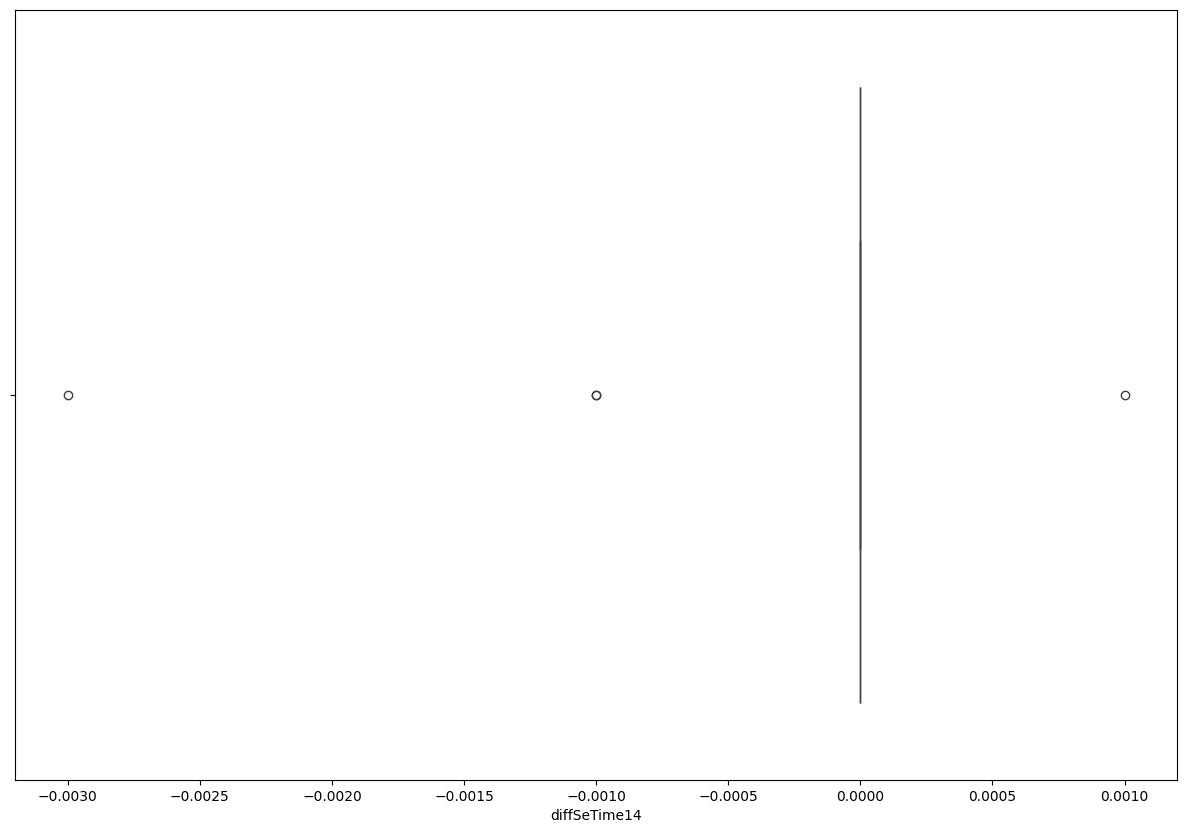

In [16]:
for i in dropcol:
    if(i!='goal'):
        plt.figure(figsize=(15,10))
        sns.boxplot(dropdf,x=i)
        plt.show()

In [17]:
common=[]
for i in dropcol:
    print(dropdf[i].nunique())
    if(dropdf[i].nunique()<=13):
        common.append(i)

1381
182
193
99
230
61
21
85
117
140
60
10
3
10
4
10
4
10
3
10
7
12
4
13
4
34


In [18]:
for i in common:
    print(dropdf[i].value_counts())

diffSeTime1
 0.000    9981
-0.002     666
 0.001     646
-0.001     618
-0.003     135
 0.002      74
-0.004      24
 0.003      19
-0.005       3
 0.004       2
Name: count, dtype: int64
diffSeTime2
 0.000    12166
-0.001        1
 0.001        1
Name: count, dtype: int64
diffSeTime3
 0.000    11323
-0.002      302
 0.001      229
-0.001      209
-0.003       49
 0.002       38
-0.004        9
 0.003        6
-0.006        2
 0.004        1
Name: count, dtype: int64
diffSeTime4
 0.000    12164
-0.001        2
-0.002        1
 0.002        1
Name: count, dtype: int64
diffSeTime5
 0.000    11182
-0.001      319
-0.002      311
 0.001      232
-0.003       62
 0.002       42
-0.004       14
-0.005        3
 0.003        2
-0.008        1
Name: count, dtype: int64
diffSeTime6
 0.000    12164
-0.002        2
-0.004        1
-0.001        1
Name: count, dtype: int64
diffSeTime7
 0.000    10929
-0.002      408
-0.001      338
 0.001      300
-0.003       90
 0.002       66
-0.004       21
-0

In [19]:
for i in common:
    print(i," ",dropdf[i].std())

diffSeTime1   0.0006956974923919964
diffSeTime2   1.2821039665643228e-05
diffSeTime3   0.00045210182229594157
diffSeTime4   2.8668245015798548e-05
diffSeTime5   0.0004829447371236776
diffSeTime6   4.532318509001649e-05
diffSeTime7   0.0005633369479180982
diffSeTime8   1.2821039665643228e-05
diffSeTime9   0.0006217036782909917
diffSeTime10   8.836104507370203e-05
diffSeTime11   0.000645121233035637
diffSeTime12   5.5881748469298207e-05
diffSeTime13   0.0006180929953656638
diffSeTime14   3.140328447203372e-05


In [20]:
todrop2=['diffSeTime2','diffSeTime4','diffSeTime6','diffSeTime8','diffSeTime10','diffSeTime12','diffSeTime14']
dropdf.describe()

,climbRate,Sgz,'p','q',curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime6,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,goal
count,12168.000000,12168.000000,12168.000000,12168.00000,12168.000000,12168.000000,12168.000000,12168.000000,12168.000000,12168.000000,...,1.216800e+04,12168.000000,12168.000000,12168.000000,1.216800e+04,12168.000000,1.216800e+04,12168.000000,1.216800e+04,12168.000000
mean,-9.348373,-12.655572,0.006755,0.06128,0.626345,0.066930,-11.080786,-0.916749,-0.000971,-0.054249,...,-7.396450e-07,-0.000090,0.000000,-0.000103,-5.752794e-07,-0.000100,-6.574622e-07,-0.000096,-3.287311e-07,-0.000873
std,259.172297,25.708511,0.305843,0.11848,0.312110,0.969512,4.098339,10.412068,0.013373,1.121761,...,4.532319e-05,0.000563,0.000013,0.000622,8.836105e-05,0.000645,5.588175e-05,0.000618,3.140328e-05,0.000405
min,-975.000000,-99.000000,-1.530000,-0.54000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,...,-4.000000e-03,-0.005000,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.02000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-0.001100
50%,-20.000000,-13.000000,0.020000,0.06000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-0.000800
75%,159.000000,3.000000,0.230000,0.13000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-0.000600
max,977.000000,94.000000,1.060000,0.62000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,...,0.000000e+00,0.004000,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,-0.000200


In [21]:
dropdf2=dropdf.drop(todrop2,axis=1,inplace=False)
testdf3=testdf2.drop(todrop2,axis=1,inplace=False)
dropdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12168 entries, 0 to 12211
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12168 non-null  int64  
 1   Sgz           12168 non-null  float64
 2   'p'           12168 non-null  float64
 3   'q'           12168 non-null  float64
 4   curPitch      12168 non-null  float64
 5   curRoll       12168 non-null  float64
 6   absRoll       12168 non-null  int64  
 7   diffClb       12168 non-null  float64
 8   diffRollRate  12168 non-null  float64
 9   diffDiffClb   12168 non-null  float64
 10  SeTime1       12168 non-null  float64
 11  diffSeTime1   12168 non-null  float64
 12  diffSeTime3   12168 non-null  float64
 13  diffSeTime5   12168 non-null  float64
 14  diffSeTime7   12168 non-null  float64
 15  diffSeTime9   12168 non-null  float64
 16  diffSeTime11  12168 non-null  float64
 17  diffSeTime13  12168 non-null  float64
 18  goal          12168 non-null  f

In [22]:
from sklearn.model_selection import train_test_split
for i in traindf.columns:
    traindf[i]=traindf[i].fillna(value=traindf[i].mean())

In [23]:
y=traindf['goal']
x=traindf.drop('goal',inplace=False,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=20)

In [24]:
print(xtrain.shape)
print(xtest.shape)

(9769, 40)
(2443, 40)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)
x_scaled=scaler.fit_transform(x)


MAE: 0.0001332826229101554
R2 score: 0.8028702341970124


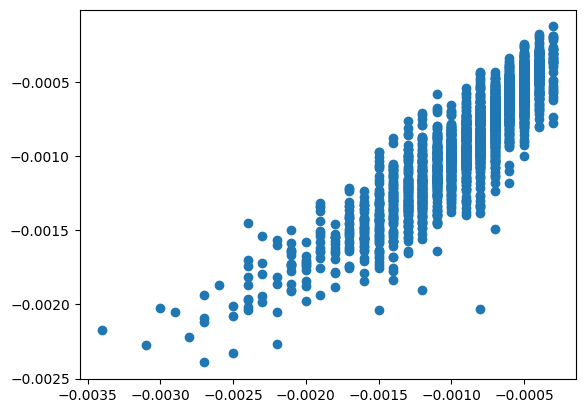

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(xtrain_scaled,ytrain)
ypred=linreg.predict(xtest_scaled)
mae = mean_absolute_error(ytest,ypred)
score = r2_score(ytest,ypred)
print('MAE:',mae)
print("R2 score:",score)
plt.scatter(ytest,ypred)

In [27]:
testdf_scaled=scaler.transform(testdf)
ypred_test=linreg.predict(testdf_scaled)
ypred_test.shape


(1538,)

In [28]:
sub=pd.DataFrame()
sub['goal']=ypred_test
sub.head()
sub.describe()

,goal
count,1538.000000
mean,-0.000855
std,0.000403
min,-0.002620
25%,-0.001082
50%,-0.000789
75%,-0.000550
max,-0.000062


In [29]:
sub.to_csv("submission.csv",index=False)

In [30]:
for i in dropdf2.columns:
  q1 = dropdf2[i].quantile(0.25)
  q3 = dropdf2[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outdf =dropdf2[(dropdf2[i] > lower_bound) & (dropdf2[i]<upper_bound)]

In [31]:
outdf.shape

(11819, 19)

In [32]:
y=dropdf2['goal']
x=dropdf2.drop('goal',inplace=False,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=20)

xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

MAE: 0.00013006967570220907
R2 score: 0.8096675175098585


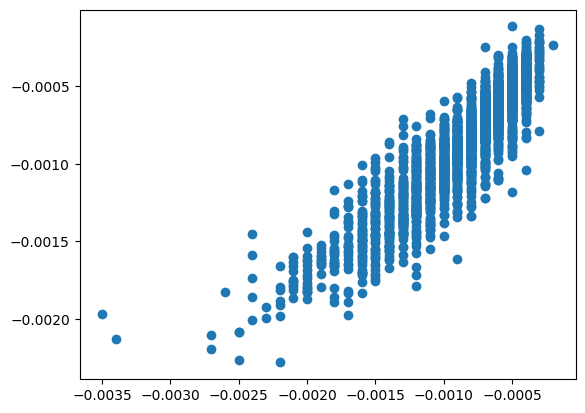

In [33]:
linreg.fit(xtrain_scaled,ytrain)
ypred=linreg.predict(xtest_scaled)
mae = mean_absolute_error(ytest,ypred)
score = r2_score(ytest,ypred)
print('MAE:',mae)
print("R2 score:",score)
plt.scatter(ytest,ypred)

In [34]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=10,random_state=20,shuffle=True)

In [35]:
from sklearn.ensemble import RandomForestRegressor
score=[]
rfreg=RandomForestRegressor(oob_score=True,n_estimators=50,random_state=20)
rfreg.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=50, oob_score=True, random_state=20)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
pred=rfreg.predict(xtest)
mse=mean_squared_error(ytest,pred)
print("mse: ",mse)
r2=r2_score(ytest,pred)
print("r2: ",r2)

mse:  2.840441084634346e-08
r2:  0.8256343271765338


In [37]:
ypred_test_rf=rfreg.predict(testdf3)
sub2=pd.DataFrame()
sub2['goal']=ypred_test_rf
sub2.to_csv('submission1.csv',index=False)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train = dropdf.drop('goal',inplace=False,axis=1)
y_train = dropdf['goal']
X_test=xtest
y_test=ytest

gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.114, random_state=42)

gb_model.fit(dropdf2.drop('goal',inplace=False,axis=1), dropdf2['goal'])


y_pred = gb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 2.218150782773404e-08
R-squared: 0.8638347558925088


In [39]:
ypred_test_gb=gb_model.predict(testdf3)
sub4=pd.DataFrame()
sub4['goal']=ypred_test_gb
sub4.to_csv('submission_gb6.csv',index=False)